# **Synthetic Dataset for Risk Assessment and Loan Approval Modeling**
---
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

> *`Risk Score Regression`*: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

> *`Binary Classification`*: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.


## Libraries

In [ ]:
# for data wrangling
import numpy as np
import pandas as pd



# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report

from sklearn.model_selection import train_test_split

#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn import model_selection
#from sklearn.utils import class_weight
#from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Data

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data

In [ ]:
loan_df = pd.read_csv('/content/Loan.csv')
loan_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#loan_df = pd.read_csv('/content/drive/My Drive/Shahma CP/Others/Loan.csv')
#loan_df

# Step 1. Understanding the data

In [ ]:
loan_df.shape

(20000, 36)

In [ ]:
print(f"The Loan Approval Dataset has {loan_df.shape[0]} occurences and {loan_df.shape[1]} features!")

The Loan Approval Dataset has 20000 occurences and 36 features!


In [ ]:
print("The features of the Dataset are:")

features = len(loan_df.columns)
features_list = [feature for feature in loan_df.columns]

for feature in features_list:
    print(feature)

The features of the Dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

## Feature  wise Data Analysis

In [ ]:
from typing import List

def display_cols_value_counts(col_names: List[str]):
    for col_name in col_names:
        print('-'*30)
        print(f"Column: {col_name}")           #column name subtitles
        print('-'*30)
        print("The datatype:", loan_df[col_name].dtypes)                      #the datatype of the feature
        print("The number of null values:", loan_df[col_name].isnull().sum())  # Display number of null values
        print(loan_df[col_name].describe())                                   #feature description
        print(" ")



        # Check if the unique values in the column are less than 10 to display frequency tables
        if loan_df[col_name].nunique() < 10:
            print("There are",loan_df[col_name].nunique(), "unique values.")
            print("The frequency table:")
            print(loan_df[col_name].value_counts())
        else:
            print("(Frequency table not displayed, there are",loan_df[col_name].nunique(), "unique values).")

        print('')


display_cols_value_counts(loan_df.columns)

------------------------------
Column: ApplicationDate
------------------------------
The datatype: object
The number of null values: 0
count          20000
unique         20000
top       2018-01-01
freq               1
Name: ApplicationDate, dtype: object
 
(Frequency table not displayed, there are 20000 unique values).

------------------------------
Column: Age
------------------------------
The datatype: int64
The number of null values: 0
count    20000.000000
mean        39.752600
std         11.622713
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64
 
(Frequency table not displayed, there are 63 unique values).

------------------------------
Column: AnnualIncome
------------------------------
The datatype: int64
The number of null values: 0
count     20000.000000
mean      59161.473550
std       40350.845168
min       15000.000000
25%       31679.000000
50%       48566.000000
75%       74391.0

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

* Integer - 21
* Decimal - 9
* String - 5

In [ ]:
loan_df.isnull().sum().sum()

0

In [ ]:
loan_df.duplicated().sum()

0

The data has no missing/duplicate values

## (1.1) Categorical Columns


In [ ]:
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [ ]:
loan_df.describe(include=['O']).T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


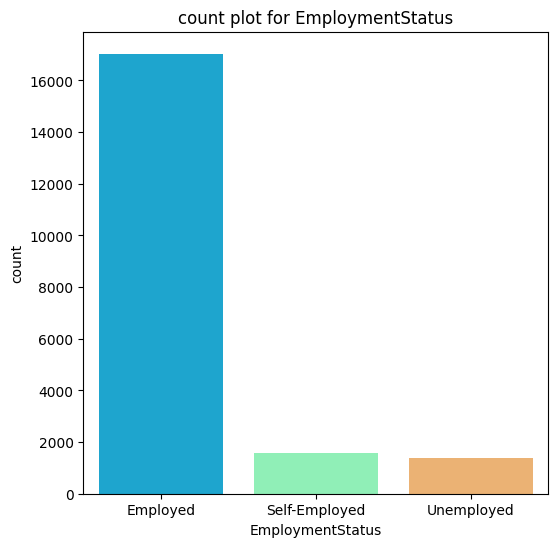

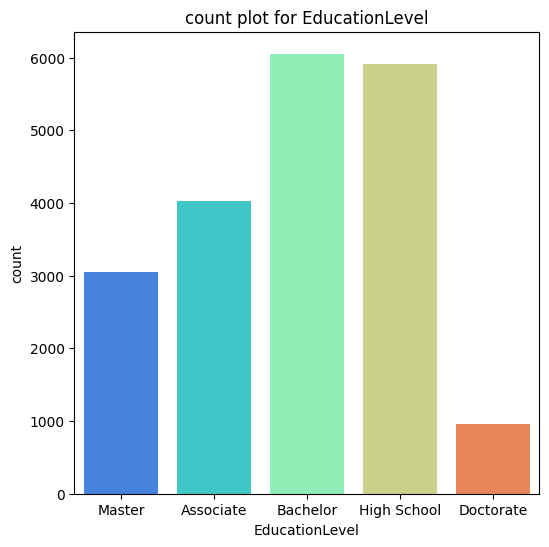

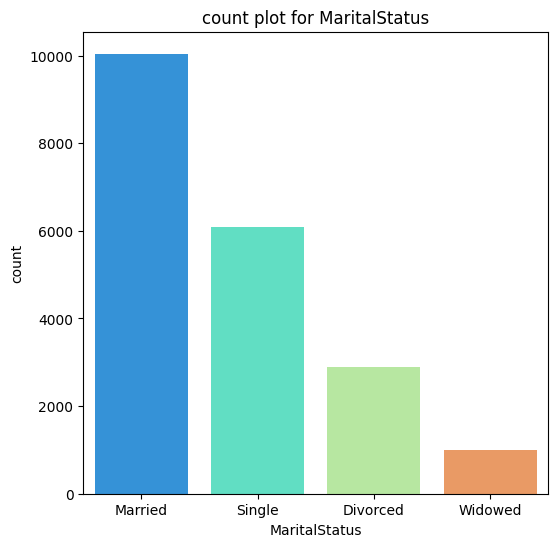

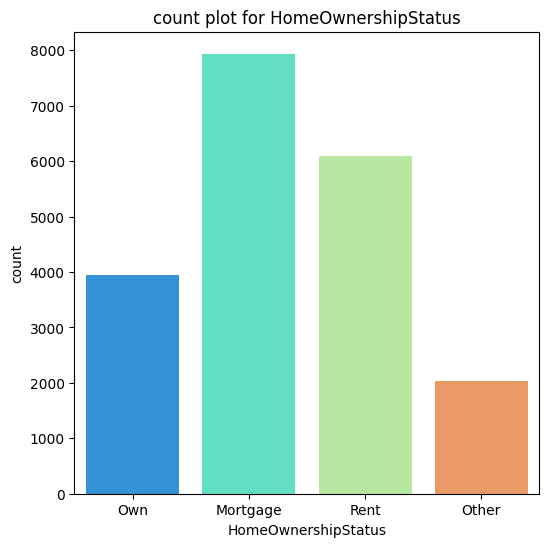

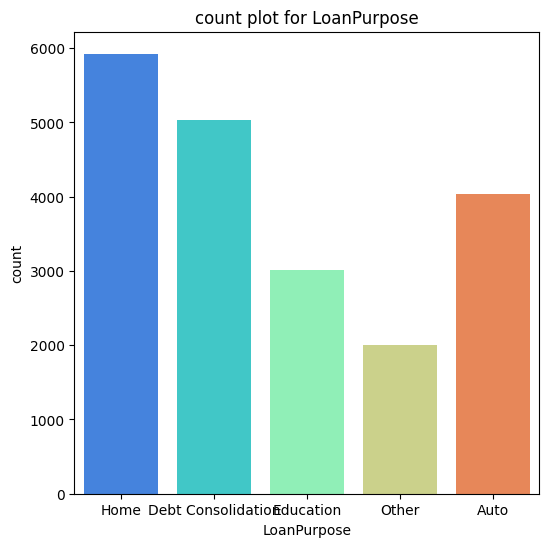

In [ ]:
for col in categorical_columns[1:]:  # Skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=loan_df, x=col , hue=col, palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

Most of the loan needed persons are
* Employed
* Married
* Comparatively less educated
* Need loan for building home.


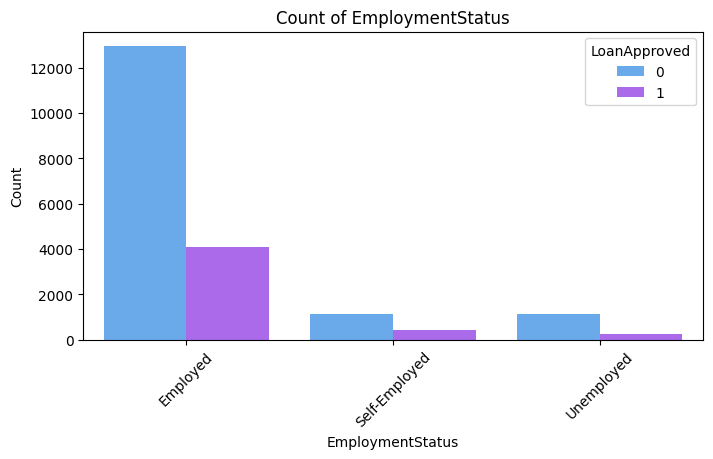

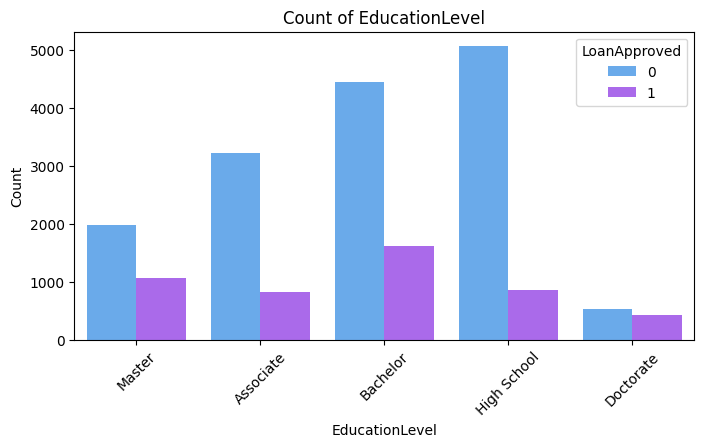

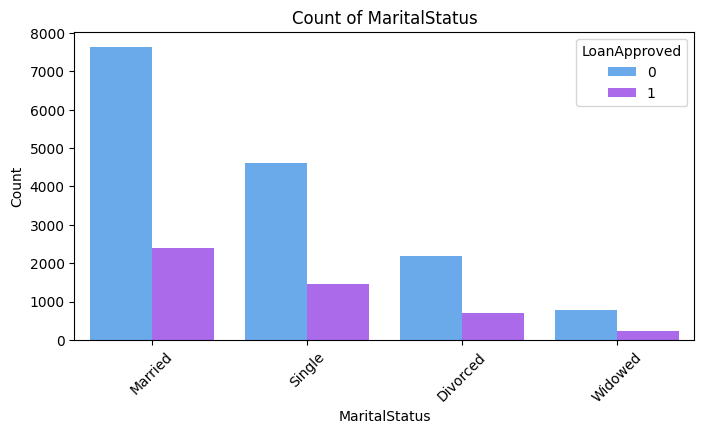

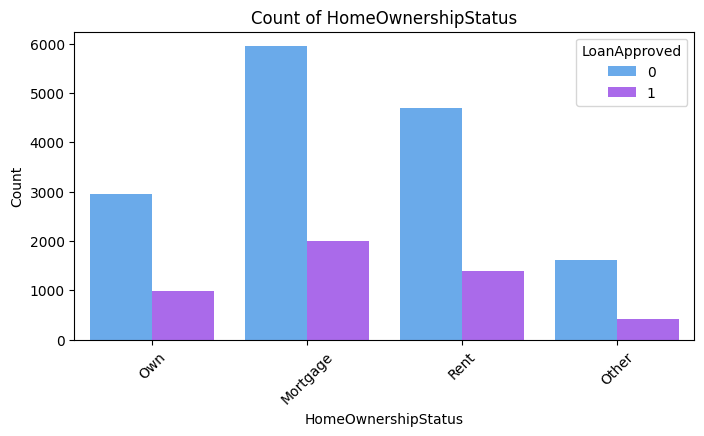

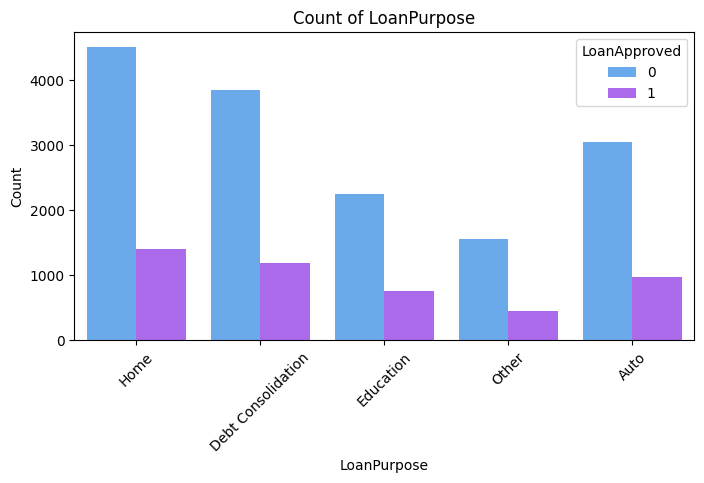

In [ ]:
# Plot countplots for each categorical column
for col in categorical_columns[1:]:  # Skip the first feature
    plt.figure(figsize=(8, 4))
    sns.countplot(data=loan_df, x=col, palette='cool',hue='LoanApproved')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Majority of loan requests are rejected in all categories(There might be some other reason affecting the riskscore).

## (1.2) Numerical Columns

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = loan_df.select_dtypes(include=numerics).columns.tolist()

print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


In [ ]:
# Numerical columns
#'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'


In [ ]:
loan_df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


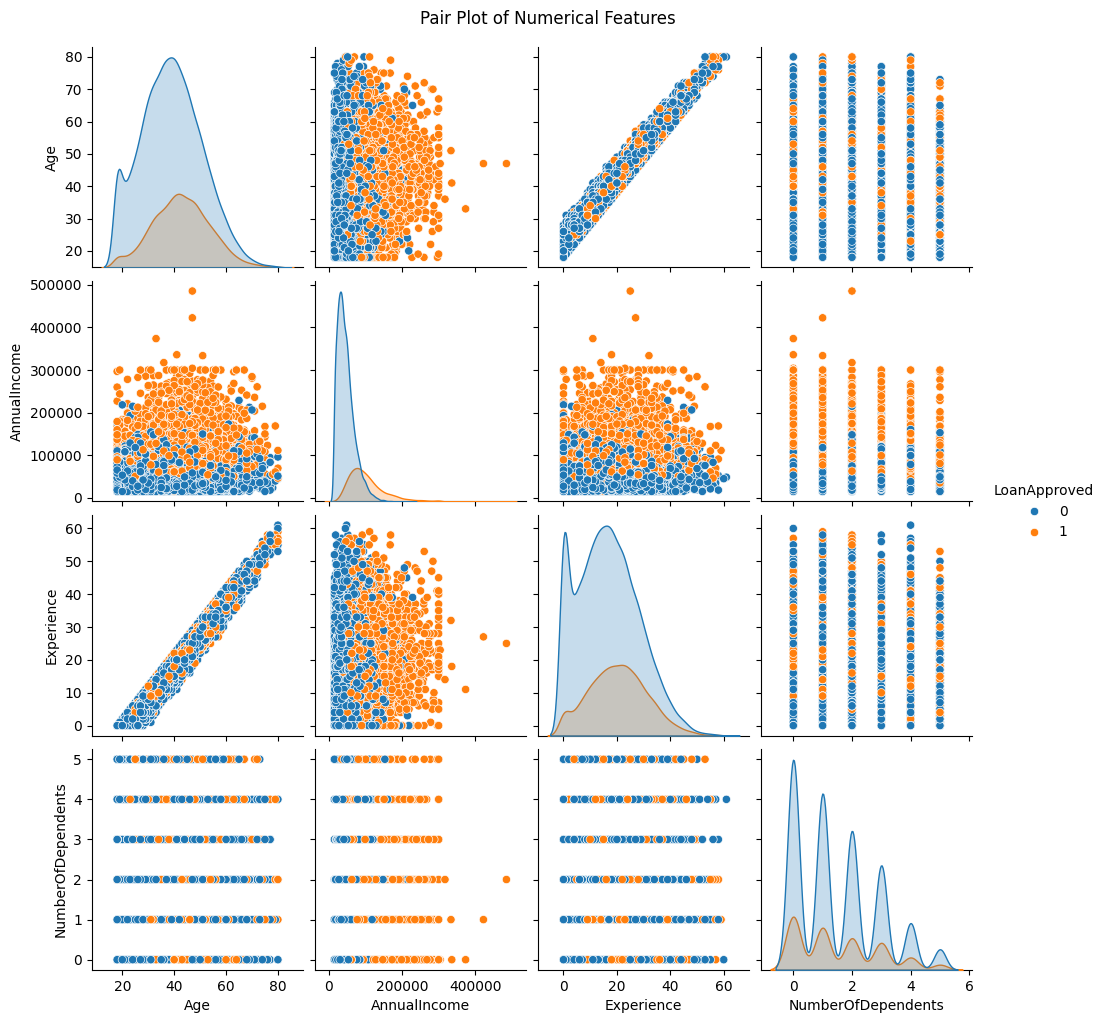

In [ ]:
# Multivariate analysis: Pair plot of numerical features(personal details)
sns.pairplot(loan_df[['Age', 'AnnualIncome', 'Experience','NumberOfDependents','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

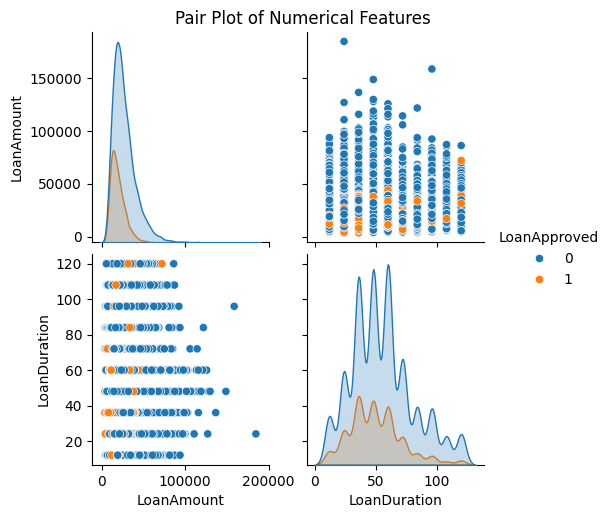

In [ ]:
# Multivariate analysis: Pair plot of numerical features(Loan details)
sns.pairplot(loan_df[['LoanAmount', 'LoanDuration','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

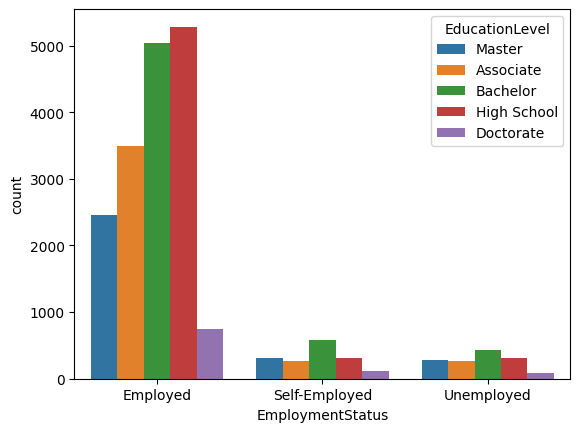

In [ ]:
sns.countplot(x='EmploymentStatus',hue='EducationLevel', data=loan_df)
plt.show()

## (1.3) Target Variable - y

* **Risk Score**: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
* **Loan Approval**: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

<ipython-input-21-f7b6df388f19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp = sns.barplot(x='LoanApproved', y='LoanAmount', data=loan_df, palette='cool' )


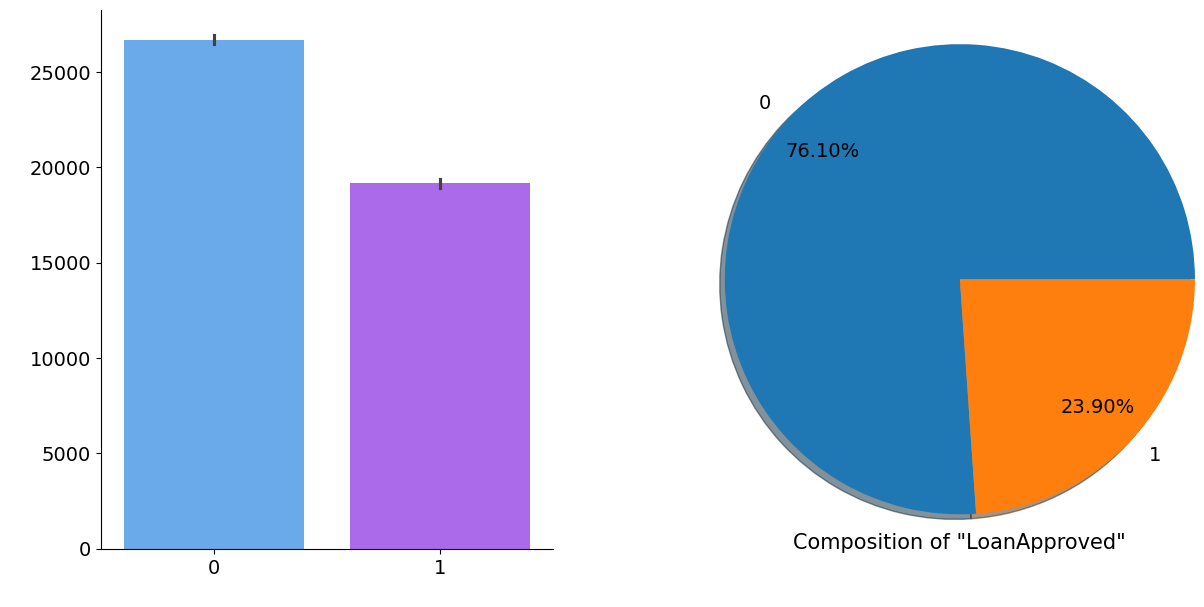

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved', y='LoanAmount', data=loan_df, palette='cool' )
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2= plt.subplot(1,2,2)
plt.pie(x=loan_df['LoanApproved'].value_counts(),
        labels=list(loan_df['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "LoanApproved"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

No need of Sampling since there are only two categories in the target column.

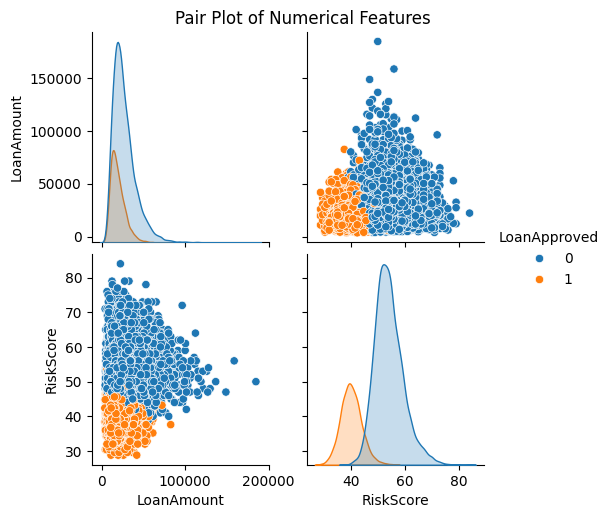

In [ ]:
# Multivariate analysis: Pair plot of numerical features(personal details)
sns.pairplot(loan_df[['LoanAmount','RiskScore','LoanApproved']], hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

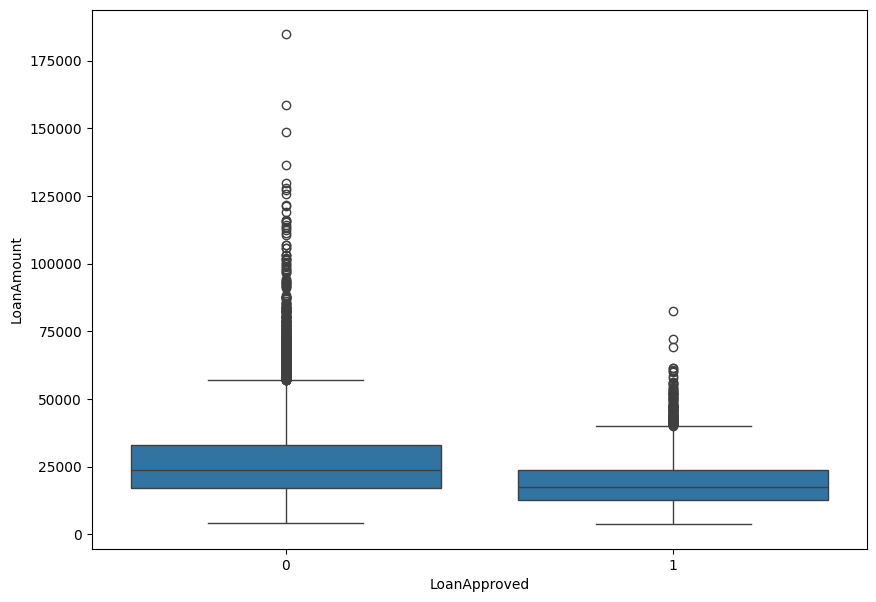

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df, x='LoanApproved', y='LoanAmount')
plt.show()

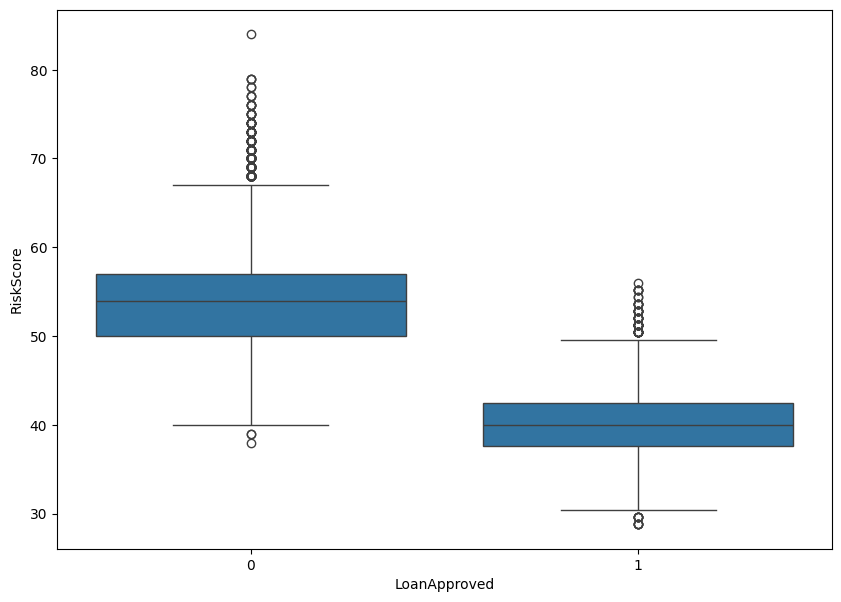

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df, x='LoanApproved', y='RiskScore')
plt.show()

# Step 2. Data Cleaning

## (2.1) Handling Null/duplicates values



No null values and no duplicates

## (2.2) Feature Engineering

In [ ]:
loan_df['BankBalance']=loan_df['SavingsAccountBalance']+loan_df['CheckingAccountBalance']

loan_df.drop('SavingsAccountBalance', axis=1, inplace=True)
loan_df.drop('CheckingAccountBalance', axis=1, inplace=True)

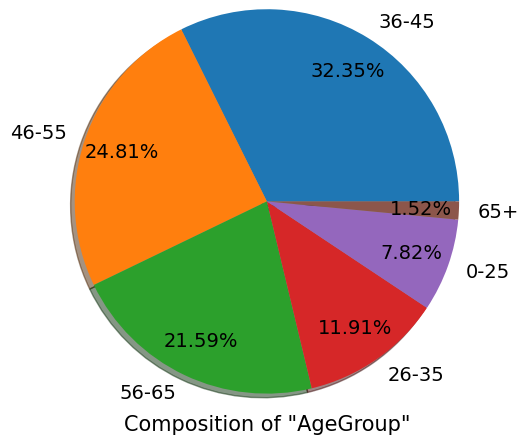

In [ ]:
# Age Binning
loan_df['AgeGroup'] = pd.cut(loan_df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '65+'])


plt.pie(x=loan_df['AgeGroup'].value_counts(),
labels=list(loan_df['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={'fontsize':14})
plt.xlabel('Composition of "AgeGroup"', fontsize=15, labelpad=20)
plt.show()

In [ ]:
loan_df.drop('AgeGroup', axis=1, inplace=True)

In [ ]:
loan_df[['year', 'month', 'day']] = loan_df['ApplicationDate'].str.split('-', expand=True)

loan_df['year'] = loan_df['year'].astype(int)
loan_df['month'] = loan_df['month'].astype(int)
loan_df['day'] = loan_df['day'].astype(int)

loan_df[['ApplicationDate','year', 'month', 'day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [ ]:
loan_df['year'].max()

2072

In [ ]:
# the ApplicationDate feature have errors. So drop it
loan_df.drop(['ApplicationDate','year', 'month', 'day'], axis=1, inplace=True)

## (2.3) Encoding

In [ ]:
categorical_columns = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


### (2.3.1) Ordinal Data

> Many machine learning models, like decision trees and regression models, rely on the relative order of numeric values. By manually assigning meaningful numbers, the model can better capture the relationship between the ordinal categories.



In [ ]:
loan_df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [ ]:
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].replace({'Unemployed': 0,'Self-Employed':1,'Employed': 2})

<ipython-input-33-49b346ec4402>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].replace({'Unemployed': 0,'Self-Employed':1,'Employed': 2})


In [ ]:
loan_df['EmploymentStatus'].unique()

array([2, 1, 0])

In [ ]:
loan_df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
loan_df['EducationLevel'] = loan_df['EducationLevel'].map({'High School': 0,
                                                            'Associate':1,
                                                           'Bachelor': 2,
                                                           'Master':3,
                                                          'Doctorate': 4})

In [ ]:
loan_df['EducationLevel'].unique()

array([3, 1, 2, 0, 4])

### (2.3.2) Nominal Data

In [ ]:
le = LabelEncoder()

# Exclude the 'ApplicationDate' column
for cols in loan_df.select_dtypes('object').columns:
    if cols != 'ApplicationDate':
        loan_df[cols] = le.fit_transform(loan_df[cols])


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## (2.4) Skewed Data

### Histograms

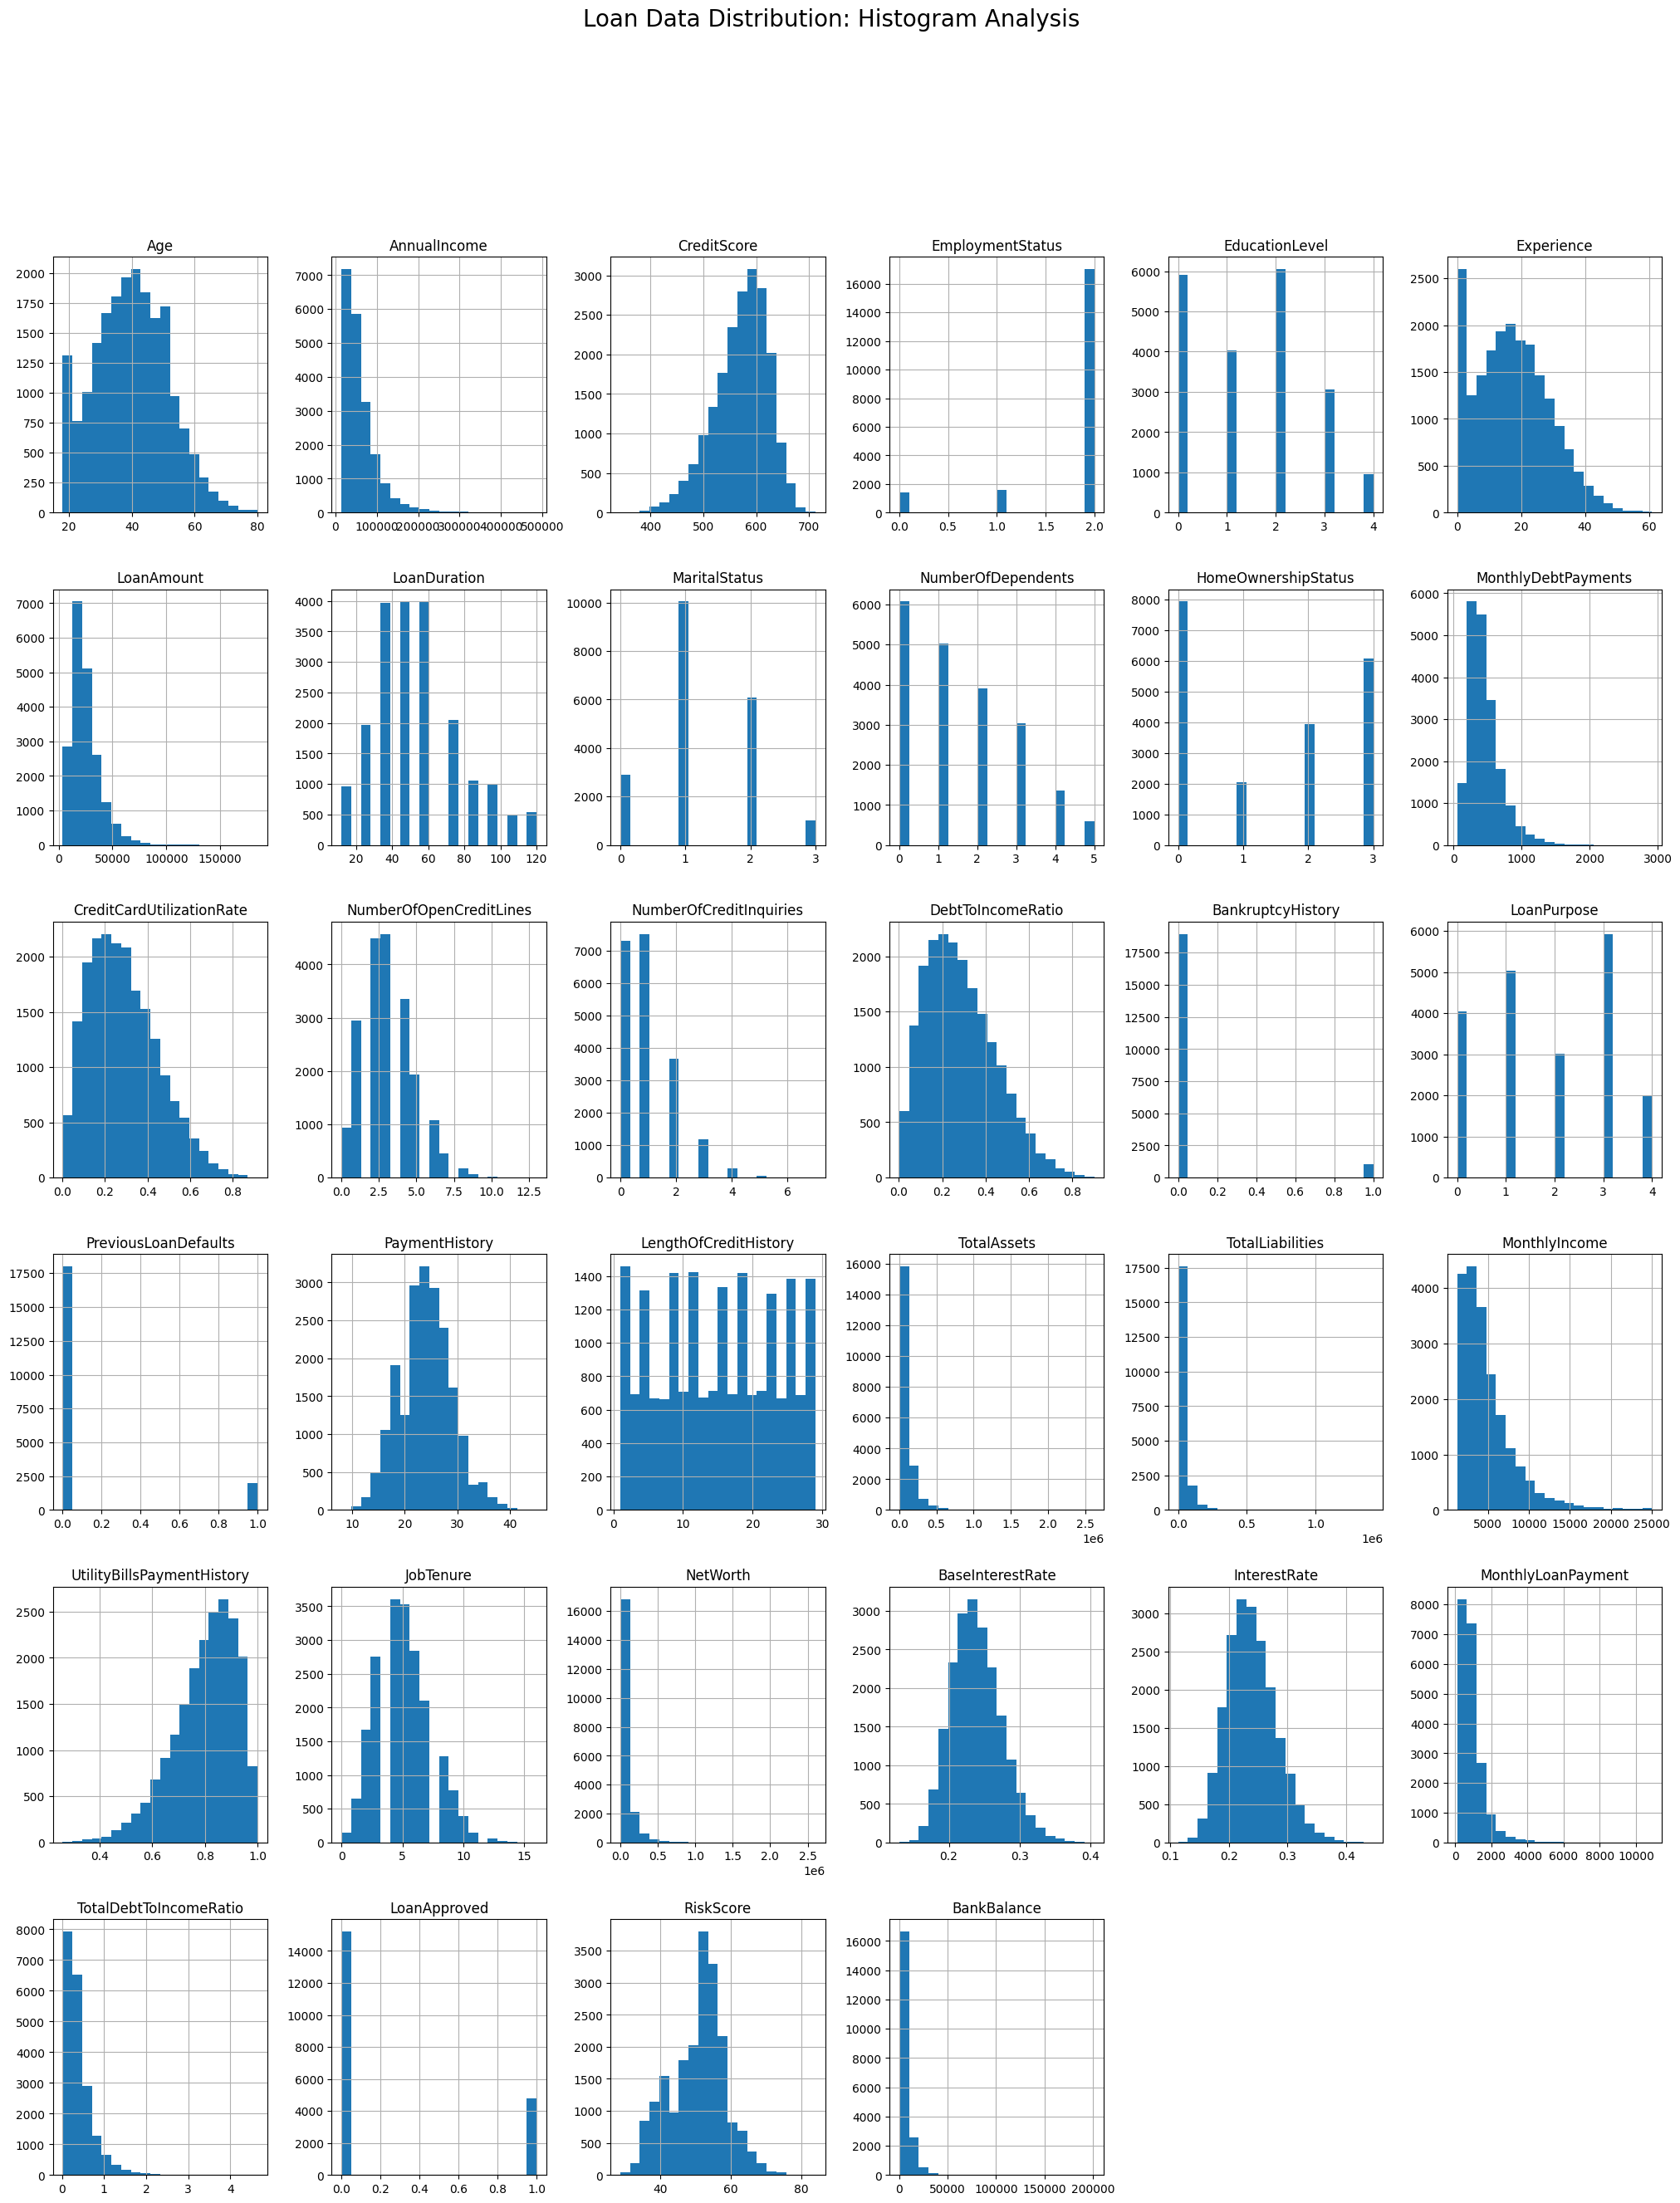

In [ ]:
loan_df.hist(bins=20, figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [ ]:
# Calculate skewness for each column
skewness = loan_df.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(sorted_skewness)

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [ ]:
# Create a copy of the original data for comparison
loan_df_copy = loan_df.copy()

# Log Transformation of skewed columns (e.g., AnnualIncome, LoanAmount)
loan_df['AnnualIncome'] = np.log1p(loan_df['AnnualIncome'])  # log(1 + x) to handle 0 values
loan_df['LoanAmount'] = np.log1p(loan_df['LoanAmount'])



The log1p function in NumPy stands for log(1 + x), where "1p" refers to adding 1 to the input value before taking the logarithm.

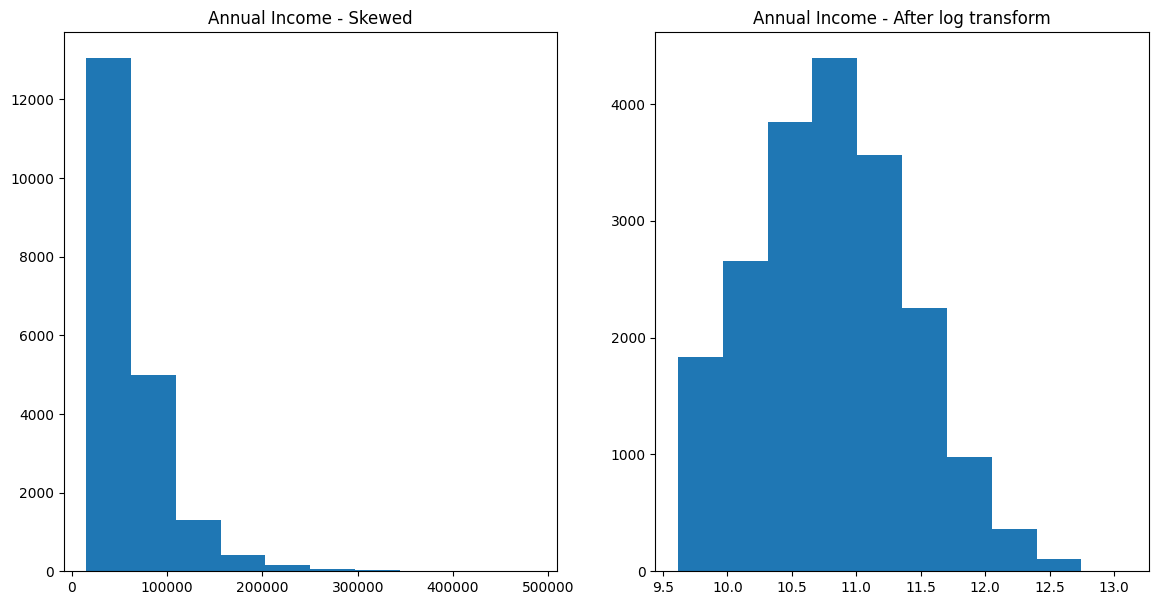

In [ ]:


plt.figure(figsize=(14,7))
#
ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_copy['AnnualIncome'])
plt.title("Annual Income - Skewed")
#
ax2= plt.subplot(1,2,2)
plt.hist(loan_df['AnnualIncome'])
plt.title("Annual Income - After log transform")
plt.show()

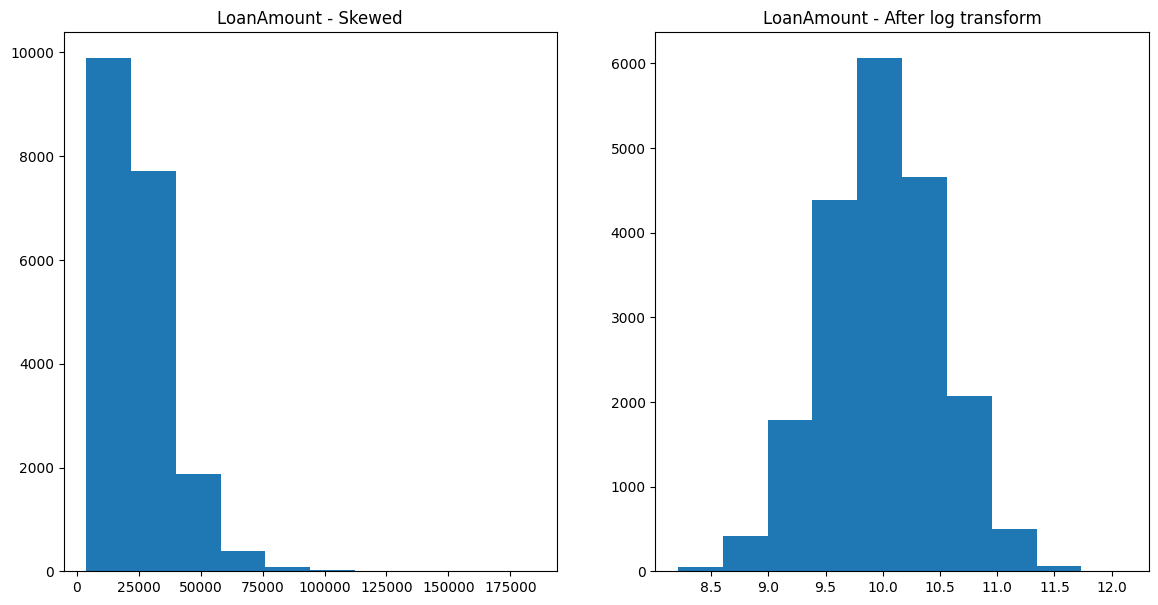

In [ ]:
plt.figure(figsize=(14,7))
#
ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_copy['LoanAmount'])
plt.title("LoanAmount - Skewed")
#
ax2= plt.subplot(1,2,2)
plt.hist(loan_df['LoanAmount'])
plt.title("LoanAmount - After log transform")
plt.show()

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  float64
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  float64
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [ ]:
# Step 1: Select numeric columns, excluding 'LoanApproved'
numeric_columns = loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

# Step 2: Calculate skewness for numeric columns
skewness = numeric_columns.skew()

# Step 3: Identify columns with high skewness (threshold > 1 or < -1)
highly_skewed_columns = skewness[abs(skewness) > 1].index

# Step 4: Apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
    # Create a new column with log-transformed values
    loan_df[col] = np.log1p(loan_df[col])

# Check transformed columns
loan_df.head()


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,10.595359,617,1.098612,3,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.589358,628,1.098612,1,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,10.614597,570,1.098612,2,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,11.143093,545,1.098612,0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,11.545054,594,1.098612,1,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


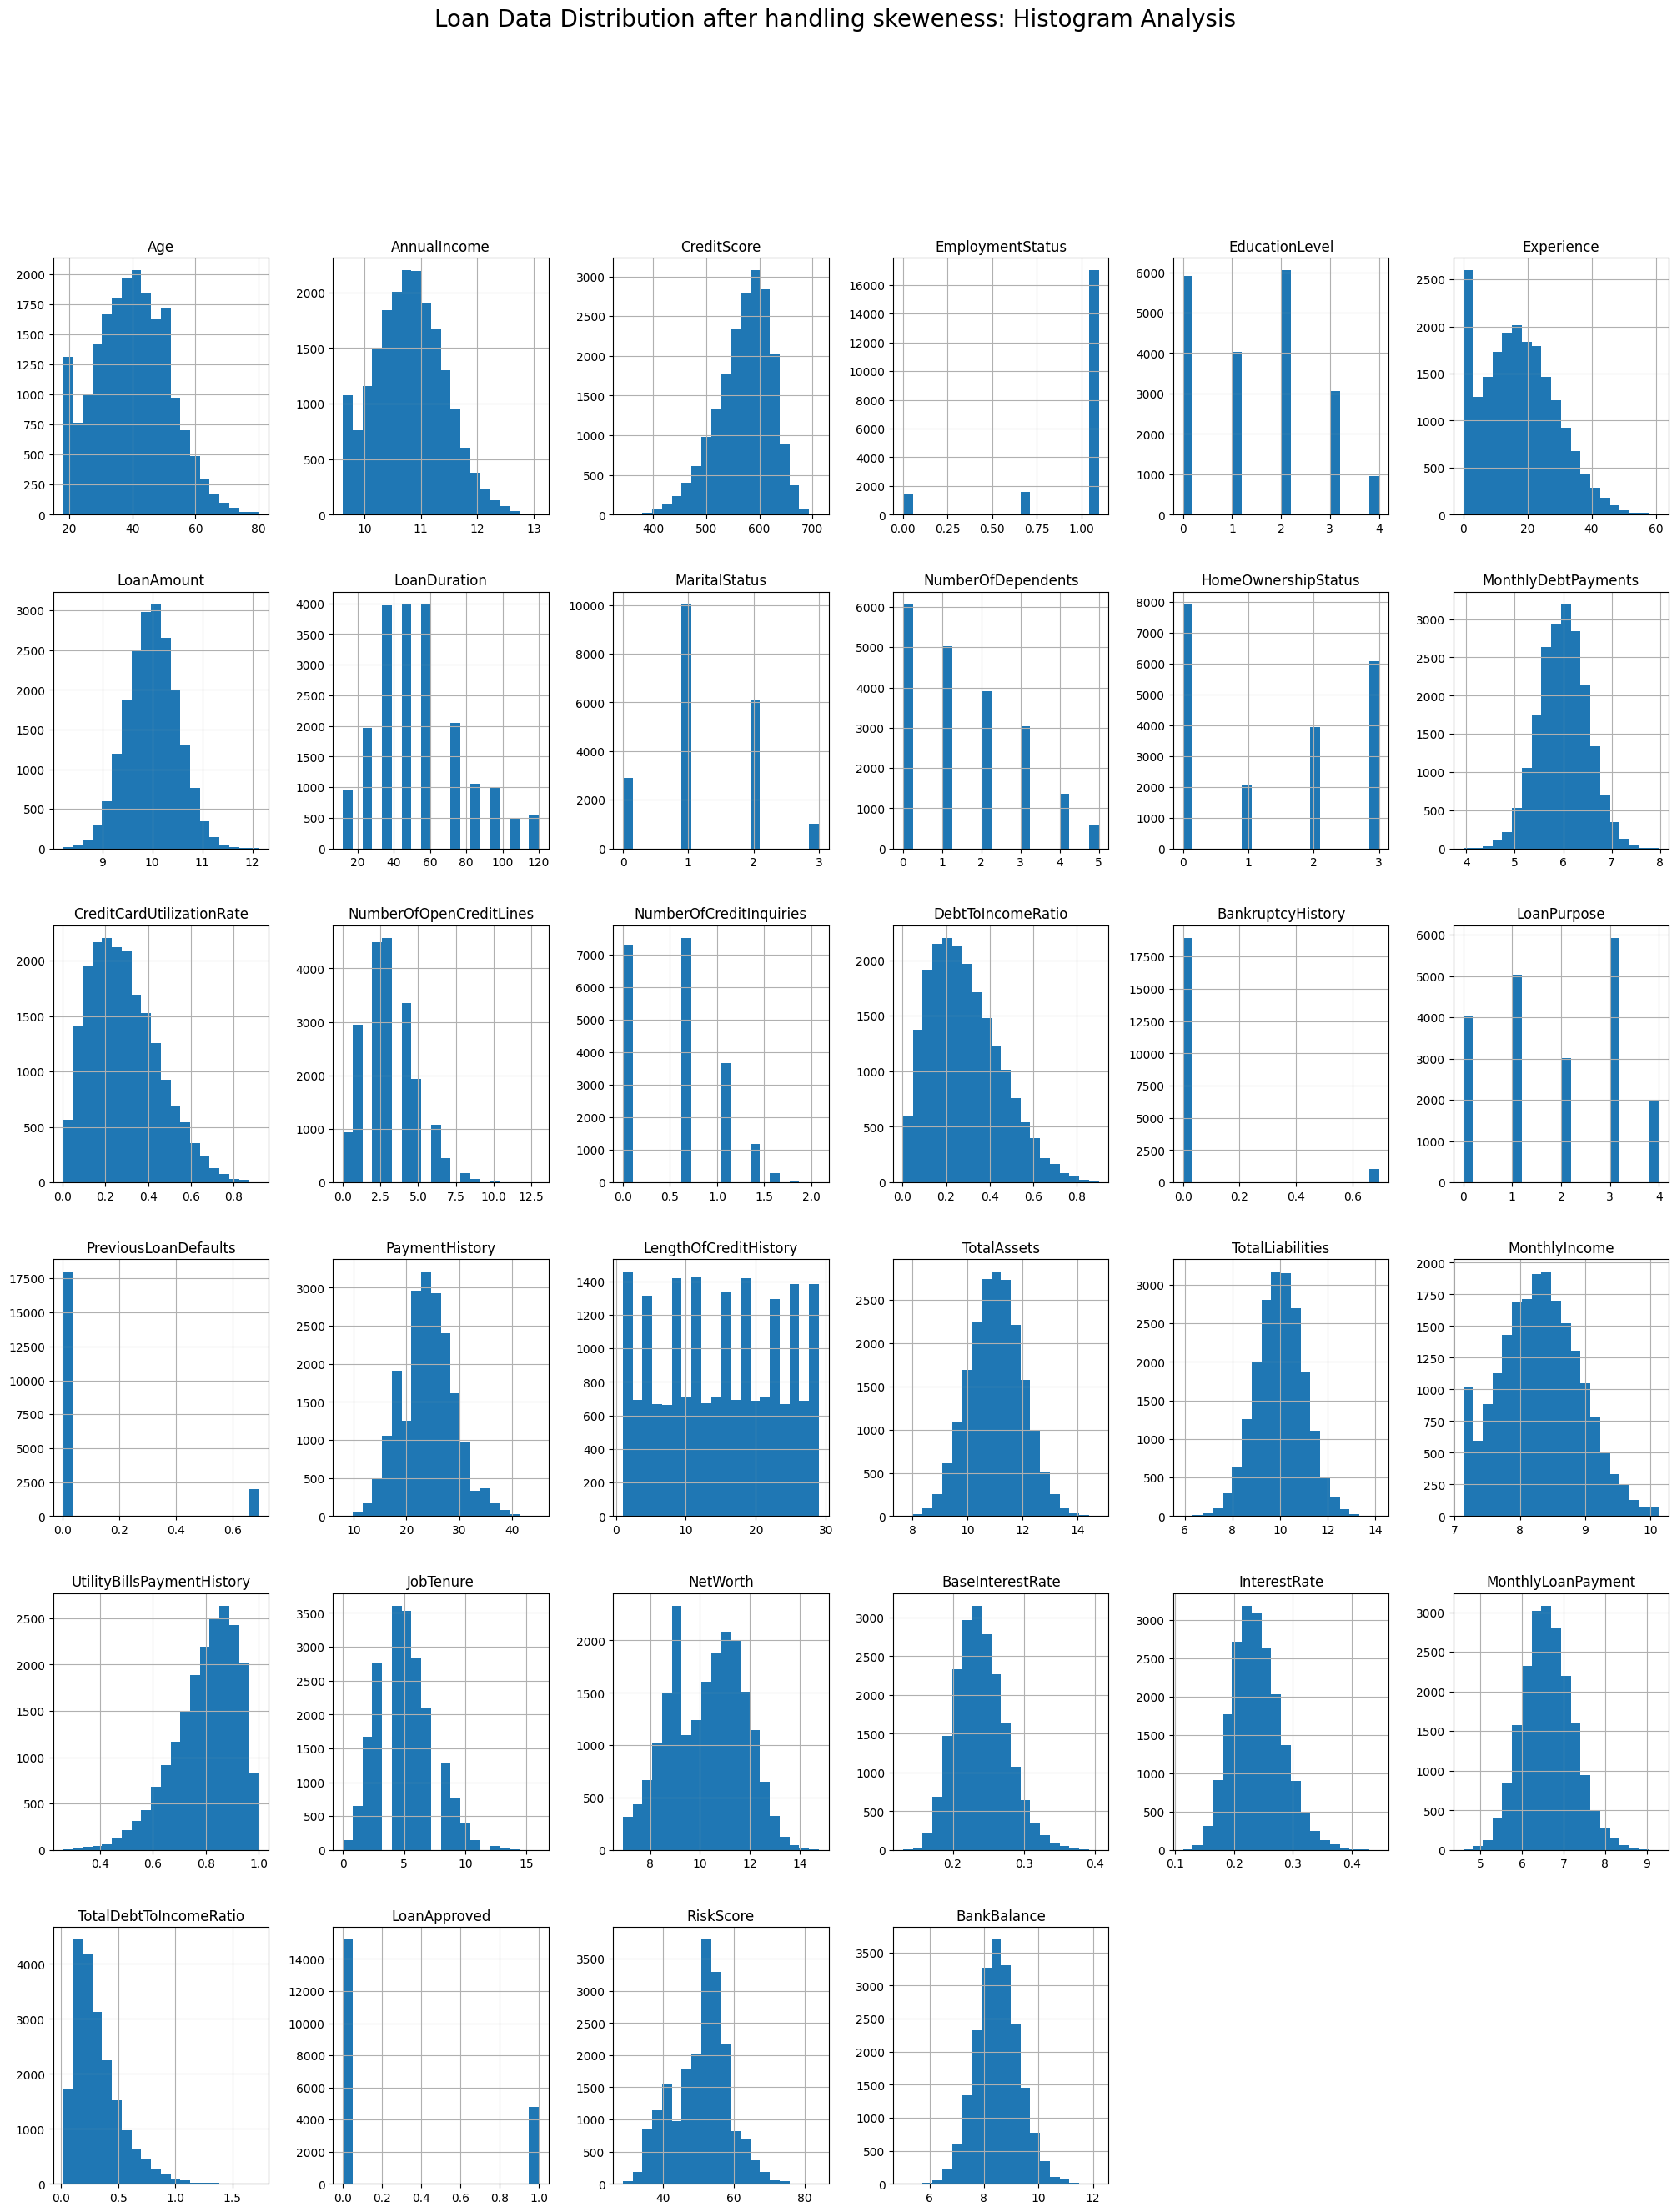

In [ ]:
loan_df.hist(bins=20, figsize=(25,30))
plt.suptitle('Loan Data Distribution after handling skeweness: Histogram Analysis', fontsize=20)
plt.show()

## (2.5) Removing Unwanted features

### (2.5.1) Based on Correlation

> After analyzing the correlations, you can remove:
- One among two Highly correlated features (between features themselves).
- Features with low correlation with the target variable.



<Axes: >

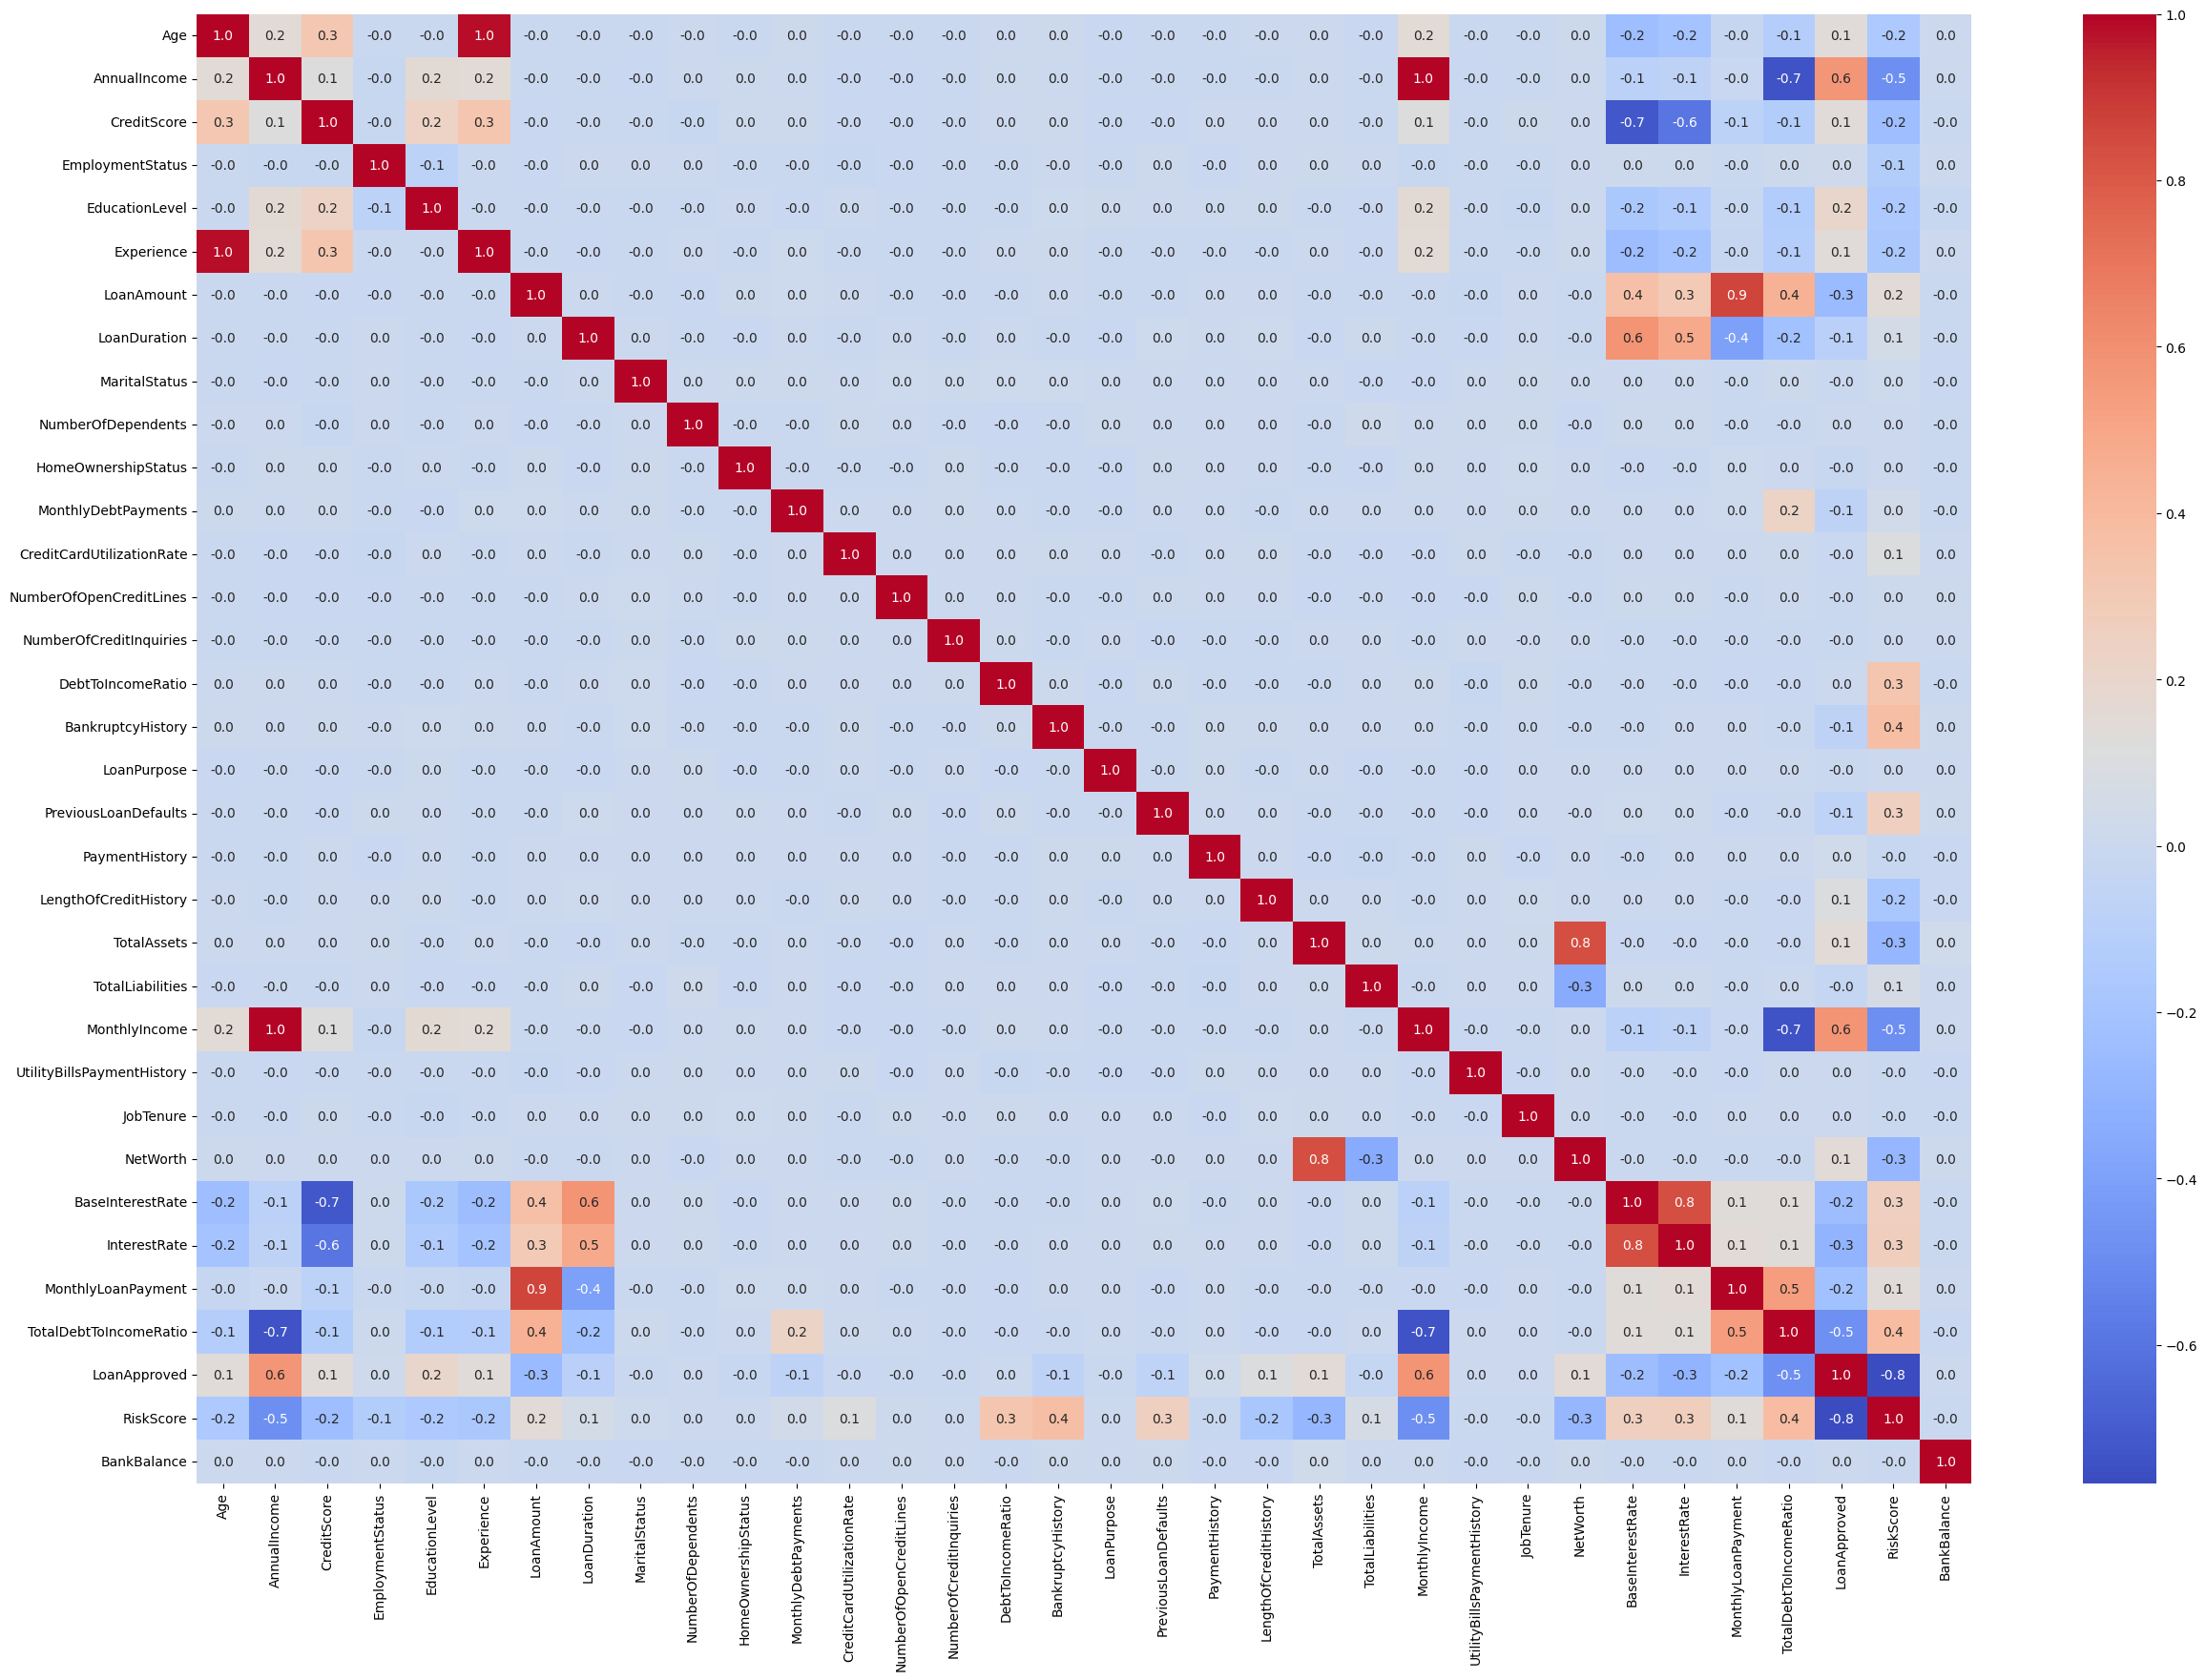

In [ ]:
plt.figure(figsize=(30, 20))
loan_df.corr(numeric_only=True)
sns.heatmap(loan_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.01f',annot_kws=None)

In [ ]:
correlation_matrix = loan_df.corr()

# Set the correlation threshold
threshold = 0.5

# Find pairs of features with high correlation
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('TotalDebtToIncomeRatio', 'AnnualIncome'), ('TotalDebtToIncomeRatio', 'MonthlyIncome'), ('TotalDebtToIncomeRatio', 'MonthlyLoanPayment'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [ ]:
loan_df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'BankBalance'],
      dtype='object')

Features with a correlation value of 0.5 or higher (positive or negative) should be considered for removal, as they are highly correlated.

In [ ]:
loan_df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'], axis=1, inplace=True)


In [ ]:
loan_df[['TotalDebtToIncomeRatio', 'MonthlyIncome']].corr()

#highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [ ]:
loan_df.drop('TotalDebtToIncomeRatio', axis=1, inplace=True)


In [ ]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_target = loan_df.corr()['LoanApproved'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features = corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_features)


Features with correlation between -0.05 and 0.05:
PaymentHistory                0.030804
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


Below features are very less correlated with the tagtet variable:-

JobTenure,
UtilityBillsPaymentHistory,
NumberOfDependents,
BankBalance,
DebtToIncomeRatio,
NumberOfOpenCreditLines,
NumberOfCreditInquiries,
MaritalStatus,
LoanPurpose

In [ ]:
loan_df.drop(['JobTenure', 'UtilityBillsPaymentHistory', 'NumberOfDependents', 'DebtToIncomeRatio', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'MaritalStatus', 'LoanPurpose'], axis=1, inplace=True)

The goal is to retain features that are strongly correlated with the target variable (either positively or negatively) and remove those that have little or no relationship.

In [ ]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_target = loan_df.corr()['RiskScore'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features = corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.1 and 0.1:")
print(low_corr_features)


Features with correlation between -0.1 and 0.1:
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalance           -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [ ]:
loan_df.drop(['MonthlyDebtPayments', 'HomeOwnershipStatus', 'PaymentHistory','BankBalance'], axis=1, inplace=True)

In [ ]:
loan_df.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'CreditCardUtilizationRate',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [ ]:
# correlation with the target variable
#loan_df.corr()['RiskScore'].sort_values(ascending=False)

In [ ]:
loan_df.drop(['LoanDuration'], axis=1, inplace=True)

In [ ]:
loan_df.drop('EducationLevel', axis=1, inplace=True)

In [ ]:
loan_df.drop(['Age'], axis=1, inplace=True)

In [ ]:
loan_df.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'LoanApproved',
       'RiskScore'],
      dtype='object')

### (2.5.2) PCA

 PCA reduces the number of features (dimensions) in a dataset.
 - Principal Components: These are the new features created by PCA. Each principal component is a linear combination of the original features, and they are ranked based on the amount of variance they explain in the data.

In [ ]:

from sklearn.decomposition import PCA

#Apply PCA
pca = PCA(n_components=5)  # You can change the number of components to retain
loan_pca = pca.fit_transform(loan_df)

# Create a DataFrame with the PCA results
loan_pca_df = pd.DataFrame(loan_pca, columns=[f'PC{i+1}' for i in range(loan_pca.shape[1])])

# Step 5: Combine the PCA components with the original DataFrame if needed
loan_pca_final_df = pd.concat([loan_df.reset_index(drop=True), loan_pca_df], axis=1)

# Now loan_pca_final_df contains the original data along with the PCA components
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,45.415168,-5.118133,-3.169741,1.365916,0.452133
1,56.295083,-6.876061,-0.186502,0.848532,-0.549209
2,-1.650936,5.432465,4.699554,-2.103498,1.017684
3,-26.719513,-5.348505,-0.664767,1.748307,-0.831976
4,22.939609,17.472947,-6.044662,1.258010,0.367145


## (2.6) Scaling

> Standardization and Normalization are two common techniques used in data preprocessing to scale features



#### (2.6.1) Standardization:

> Standardization transforms data to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the data and dividing by the standard deviation.


> Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data (e.g., linear regression, logistic regression, SVM, etc.). It works well with algorithms that rely on the distance between data points (e.g., k-NN, PCA).





In [ ]:
# Create a copy of the original data for comparison
loan_scaled_df = loan_df.copy()

# Select numeric columns, excluding 'LoanApproved'
numeric_columns = loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler only to the numeric columns
loan_scaled_df[numeric_columns] = scaler.fit_transform(loan_df[numeric_columns])
loan_scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


In [ ]:
# loan_df[['LoanApproved']].value_counts()

#### (2.6.2) Normalization:

> Normalization transforms data to a specific range, usually [0, 1] or [-1, 1]. The idea is to rescale the data without distorting the differences in the ranges of values.


> Normalization is preferred when you know that the data does not follow a normal distribution and when you need to constrain the data within a fixed range. It is commonly used in algorithms such as neural networks and k-means clustering, where the magnitude of the data matters.





## (2.7) Handling Outliers

### Boxplots

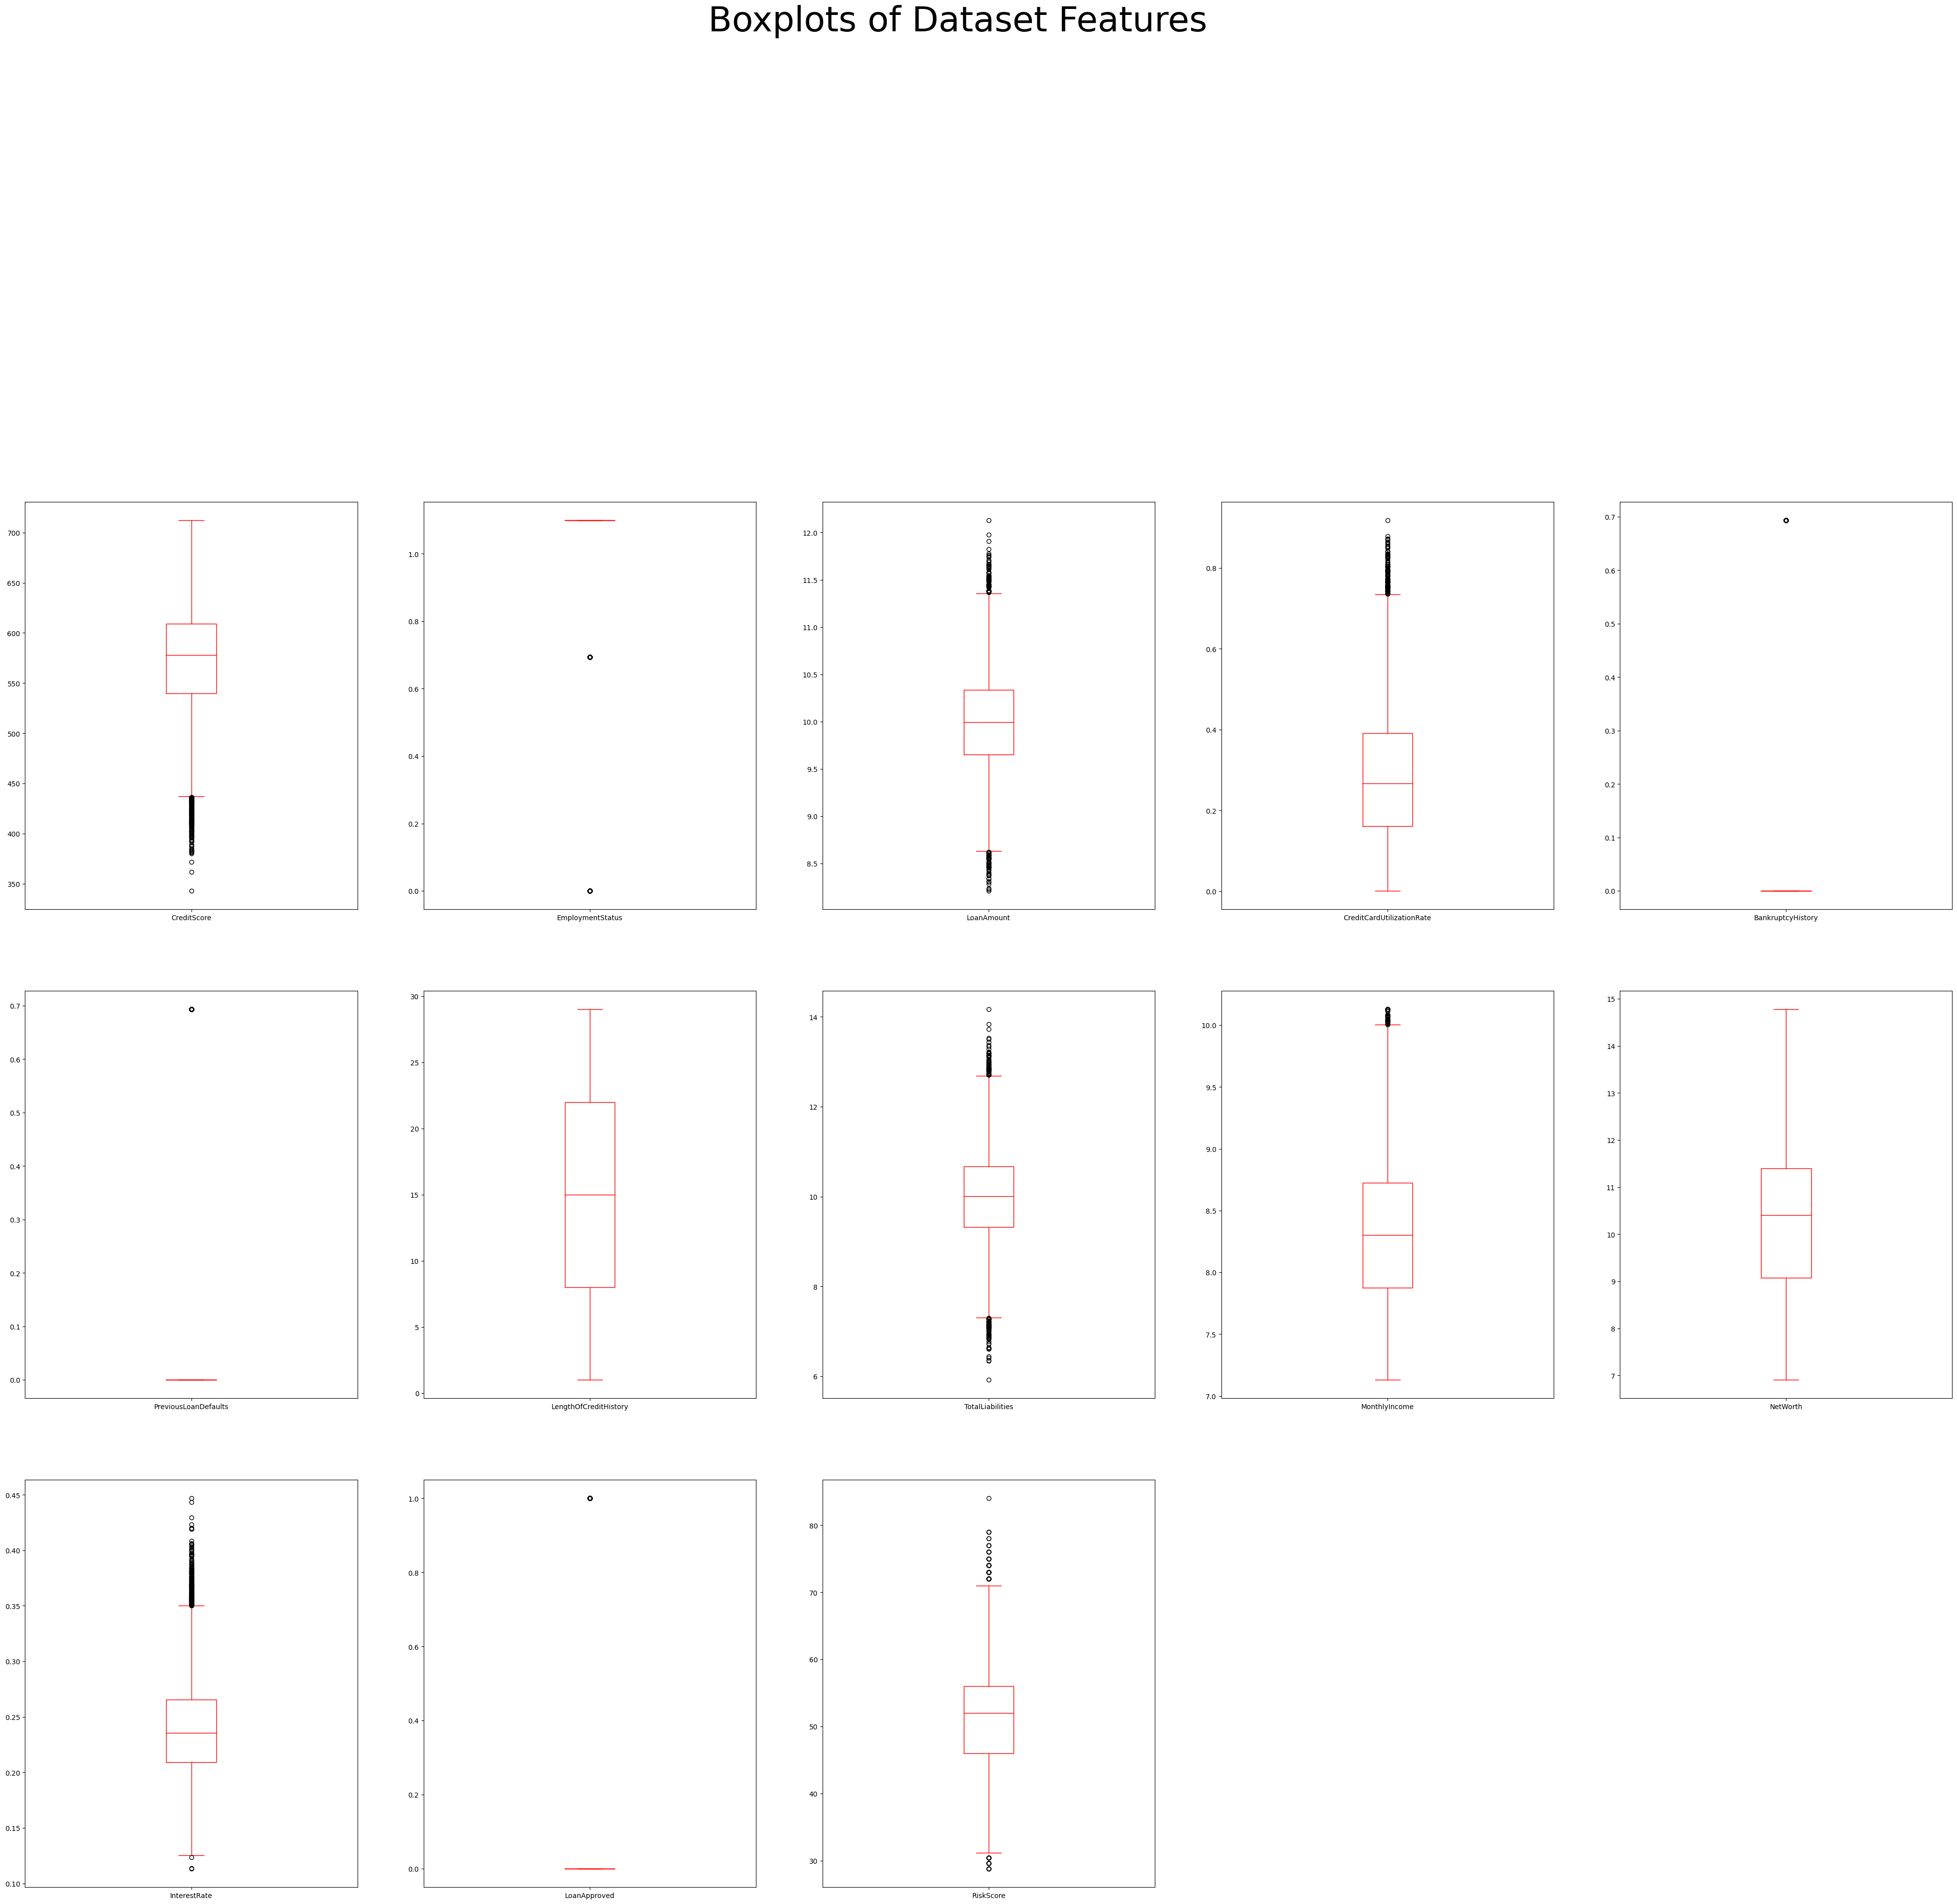

In [ ]:
loan_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(50, 100), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

In [ ]:
# Create a copy of the original data for comparison
loan_df_copy = loan_df.copy()

def remove_outliers_iqr(df, exclude_columns):
    # Loop through numeric columns
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue  # Skip excluded columns

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Define the columns to exclude
exclude_columns = ['LoanApproved', 'RiskScore']

# Remove outliers
loan_df = remove_outliers_iqr(loan_df, exclude_columns)

# Print shapes of data before and after removing outliers
print("Shape of data before removing outliers:", loan_df_copy.shape)
print("Shape of data after removing outliers:", loan_df.shape)
print("Number of outliers removed:", loan_df_copy.shape[0] - loan_df.shape[0])


Shape of data before removing outliers: (20000, 13)
Shape of data after removing outliers: (13849, 13)
Number of outliers removed: 6151


# Step 3. Model Training and Evaluattion

## (3.1) Regression Modeling

> **Risk Score Regression**: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.



In [ ]:
x1=loan_df.drop('RiskScore',axis=1)
y1=loan_df[['RiskScore']]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print('Shape of Training Features: ',x1_train.shape)
print("Shape of Testing Features: ",x1_test.shape)
print("Shape of Training Target: ",y1_train.shape)
print("Shape of Testig Target: ",y1_test.shape)

Shape of Training Features:  (11079, 12)
Shape of Testing Features:  (2770, 12)
Shape of Training Target:  (11079, 1)
Shape of Testig Target:  (2770, 1)


In [ ]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    #"MLP_Regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor' : ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    #'CatBoostRegressor':CatBoostRegressor(),
    'XGBRegressor': XGBRegressor()
}

In [ ]:
# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x1_train, y1_train)

    # Make predictions
    y1_pred = model.predict(x1_test)

    # Calculate metrics
    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 11079, number of used features: 9
[LightGBM] [Info] Start training from score 48.872335


,Model,MSE,MAE,R²
0,Linear_Regression,9.788375,2.558468,0.791813
1,RandomForest_Regressor,7.595465,2.326232,0.838454
2,GradientBoosting_Regressor,6.947466,2.255705,0.852236
3,DecisionTree_Regressor,14.795047,3.066931,0.685327
4,SVM,42.864007,5.085747,0.088335
5,AdaBoostRegressor,8.102065,2.468794,0.827679
6,ExtraTreesRegressor,7.826086,2.365999,0.833549
7,BaggingRegressor,8.250684,2.399148,0.824518
8,LGBMRegressor,7.132404,2.273067,0.848303
9,XGBRegressor,7.861235,2.342259,0.832801


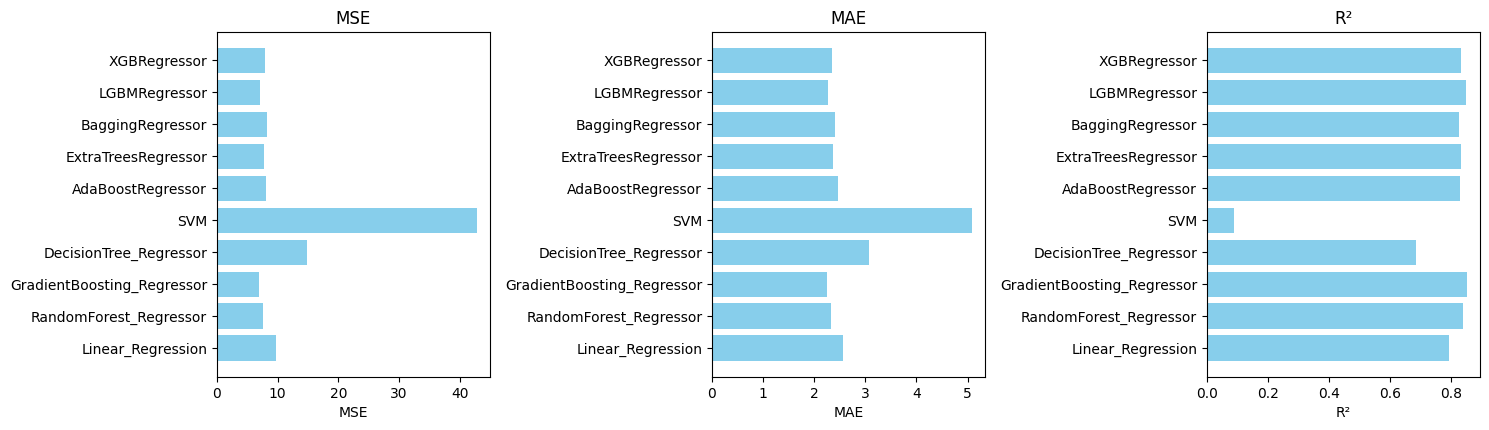

In [ ]:
# Plotting each metric
metrics = ['MSE', 'MAE', 'R²']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    #plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

### (3.1.1) Regression On scaled Data

In [ ]:
x1s=loan_scaled_df.drop('RiskScore',axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x1s_train, y1s_train)

    # Make predictions
    y1s_pred = model.predict(x1s_test)

    # Calculate metrics
    mse1 = mean_squared_error(y1s_test, y1s_pred)
    mae1 = mean_absolute_error(y1s_test, y1s_pred)
    r21= r2_score(y1s_test, y1s_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse1)
    results['MAE'].append(mae1)
    results['R²'].append(r21)

# Convert results to a DataFrame
results_df1 = pd.DataFrame(results)

# Display the results
#results_df1

# Sort by Accuracy
results_df1 = results_df1.sort_values(by='MSE', ascending=True)

# Display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.009876


,Model,MSE,MAE,R²
2,GradientBoosting_Regressor,0.113993,0.287844,0.888924
8,LGBMRegressor,0.115594,0.289572,0.887364
9,XGBRegressor,0.126902,0.300170,0.876346
1,RandomForest_Regressor,0.128291,0.300851,0.874993
6,ExtraTreesRegressor,0.128325,0.300466,0.874959
7,BaggingRegressor,0.138959,0.309079,0.864597
4,SVM,0.140564,0.305231,0.863034
0,Linear_Regression,0.163206,0.329533,0.840971
5,AdaBoostRegressor,0.172493,0.353238,0.831922
3,DecisionTree_Regressor,0.241604,0.386645,0.764579


<ipython-input-86-ef8d119333a3>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=90)


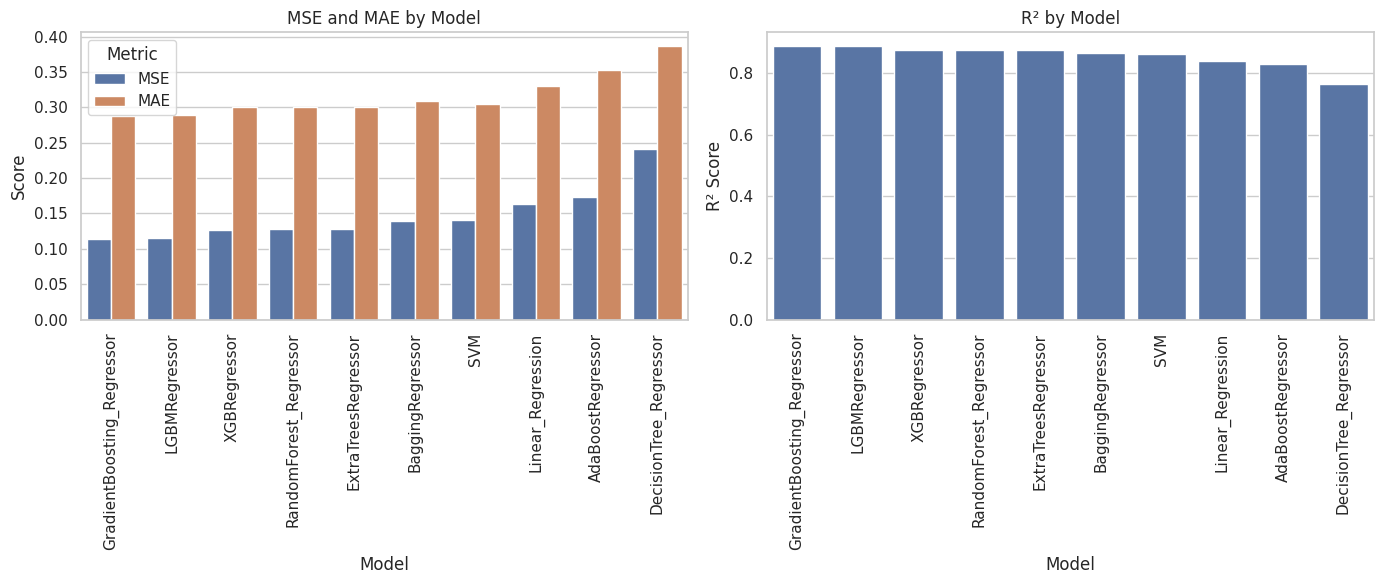

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot MSE and MAE in a grouped bar chart
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE and MAE grouped bar plot
results_melt = results_df1.melt(id_vars='Model', value_vars=['MSE', 'MAE'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melt, ax=ax[0])
ax[0].set_title('MSE and MAE by Model')
ax[0].set_ylabel('Score')
ax[0].set_xlabel('Model')
ax[0].legend(title='Metric')

# Plot R² separately
sns.barplot(x='Model', y='R²', data=results_df1, ax=ax[1])
ax[1].set_title('R² by Model')
ax[1].set_ylabel('R² Score')
ax[1].set_xlabel('Model')

# Rotate the x-axis labels if necessary
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()



Based on the analysis of the loan approval dataset for predicting the RiskScore, the `GradientBoostingRegressor` model demonstrated the best performance among the tested models.

## (3.2) Classification Modeling



> **Binary Loan Approval Classification**: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.





In [ ]:
# Convert 'LoanApproved' from float to int
loan_df['LoanApproved'] = loan_df['LoanApproved'].astype(int)

x=loan_df.drop('LoanApproved',axis=1)
y=loan_df[['LoanApproved']]

In [ ]:
loan_df[['LoanApproved']].value_counts()

,count
LoanApproved,
0,10254
1,3595


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print('Shape of Training Features: ',x_train.shape)
print("Shape of Testing Features: ",x_test.shape)
print("Shape of Training Target: ",y_train.shape)
print("Shape of Testig Target: ",y_test.shape)

Shape of Training Features:  (11079, 12)
Shape of Testing Features:  (2770, 12)
Shape of Training Target:  (11079, 1)
Shape of Testig Target:  (2770, 1)


In [ ]:
clas_models = {'lr':LogisticRegression(max_iter=500),
'rfc':  RandomForestClassifier(),
'dtc':DecisionTreeClassifier(),
'knn':KNeighborsClassifier(n_neighbors=11),
'svm':SVC(kernel='linear'),
'gbc': GradientBoostingClassifier(random_state = 0, learning_rate=0.45),
'etc': ExtraTreesClassifier(),
'nb':GaussianNB()}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


# Evaluate each model
for model_name, model in clas_models.items():
    # Train the model
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred)
    recall = recall_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)

    # Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.982671,0.975783,0.956704,0.966150
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.990614,0.988669,0.974860,0.981716
2,DecisionTreeClassifier(),0.993141,0.988780,0.984637,0.986704
3,KNeighborsClassifier(n_neighbors=11),0.981588,0.979798,0.948324,0.963804
4,SVC(kernel='linear'),0.989170,0.988604,0.969274,0.978843
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.997834,0.997199,0.994413,0.995804
6,"(ExtraTreeClassifier(random_state=908282781), ...",0.990975,0.991465,0.973464,0.982382
7,GaussianNB(),0.978339,0.959384,0.956704,0.958042


### (3.2.1) Classification On scaled Data

In [ ]:
x2s=loan_scaled_df.drop('LoanApproved',axis=1)
y2s=loan_scaled_df[['LoanApproved']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)


# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model
for model_name, model in clas_models.items():
    # Train the model
    model.fit(x2s_train, y2s_train)
    model_pred2s = model.predict(x2s_test)

    # Calculate metrics
    accuracy2 = accuracy_score(y2s_test, model_pred2s)
    precision2= precision_score(y2s_test, model_pred2s)
    recall2 = recall_score(y2s_test, model_pred2s)
    f12 = f1_score(y2s_test, model_pred2s)

    # Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy2)
    results['Precision'].append(precision2)
    results['Recall'].append(recall2)
    results['F1-Score'].append(f12)

# Convert results to a DataFrame
results_df2 = pd.DataFrame(results)



# Sort by Accuracy
results_df2 = results_df2.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame with background gradient
results_df2.style.background_gradient('Blues')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

,Model,Accuracy,Precision,Recall,F1-Score
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.999000,0.998033,0.998033,0.998033
0,LogisticRegression(max_iter=500),0.996750,0.995069,0.992134,0.993599
4,SVC(kernel='linear'),0.996500,0.995064,0.991150,0.993103
6,ExtraTreesClassifier(),0.995500,0.996028,0.986234,0.991107
1,RandomForestClassifier(),0.993250,0.990099,0.983284,0.986680
2,DecisionTreeClassifier(),0.990750,0.984190,0.979351,0.981764
3,KNeighborsClassifier(n_neighbors=11),0.989500,0.994924,0.963618,0.979021
7,GaussianNB(),0.957500,0.912366,0.921337,0.916830


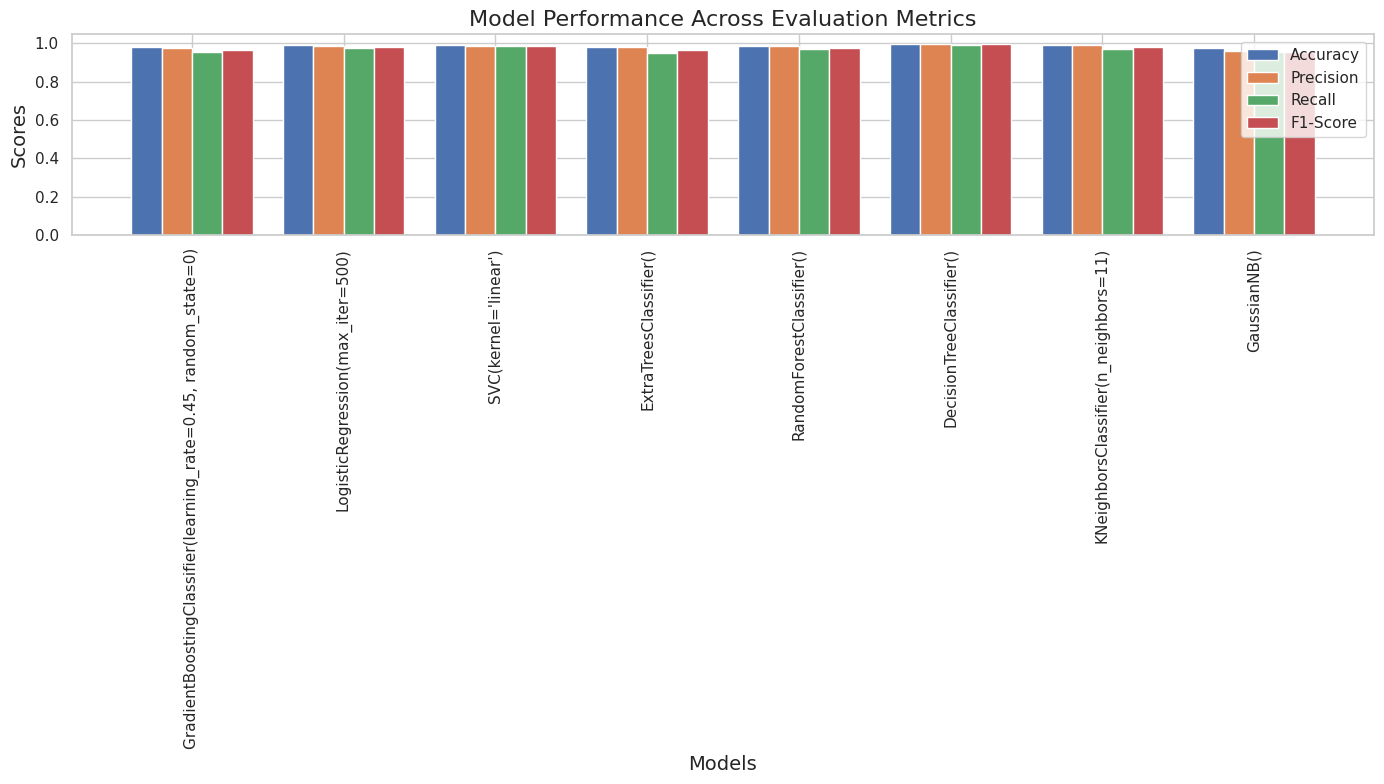

In [ ]:
# Set figure size
plt.figure(figsize=(14, 8))

# Define the number of models and metrics
n_models = len(results_df2['Model'])
n_metrics = len(['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Create an array for the positions of the bars for each model
bar_width = 0.2  # Width of the bars
index = np.arange(n_models)

# Plot bars for each metric
plt.bar(index, results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(index + bar_width, results_df['Precision'], width=bar_width, label='Precision')
plt.bar(index + 2 * bar_width, results_df['Recall'], width=bar_width, label='Recall')
plt.bar(index + 3 * bar_width, results_df['F1-Score'], width=bar_width, label='F1-Score')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Across Evaluation Metrics', fontsize=16)

# Add the model names as x-ticks
plt.xticks(index + 1.5 * bar_width, results_df2['Model'], rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Based on the evaluation of the classification models for predicting loan approval, the `GradientBoostingClassifier` with a learning rate of 0.45 and random state set to 0 emerged as the best-performing model. It achieved the highest accuracy and consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

# Step 4. Hyperparameter Tuning

GridSearchCV is a method from scikit-learn that:

Systematically tests combinations of hyperparameters from a specified grid.
Uses cross-validation to evaluate each combination.
Finds the combination that optimizes the specified scoring metric.


## (5.1) Hyperparameter Tuning for GradientBoostingRegressor

Tune parameters like:

* `n_estimators`: Number of boosting stages.
* `learning_rate`: Shrinks contribution of each tree.
* `max_depth`: Maximum depth of individual trees.
* `subsample`: Fraction of samples used for fitting individual trees.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}                                         # The GridSearchCV will test all combinations of these values, e.g., 3×3×3*2=54 combinations in this case.

# Initialize the model
gbr = GradientBoostingRegressor(random_state=0)

# Perform Grid Search
grid_search_reg = GridSearchCV(estimator=gbr, param_grid=param_grid_reg,
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_reg.fit(x1s_train, y1s_train)

# Best parameters and evaluation
print("Best Parameters (Regressor):", grid_search_reg.best_params_)
best_gbr = grid_search_reg.best_estimator_
y_pred_reg = best_gbr.predict(x1s_test)

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y1s_test, y_pred_reg)
mae = mean_absolute_error(y1s_test, y_pred_reg)
r2 = r2_score(y1s_test, y_pred_reg)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best Parameters (Regressor): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 0.11278432730631438
Mean Absolute Error: 0.2871153457731958
R-squared: 0.8901023708136746


'param_grid_reg' is a dictionary specifying the hyperparameters to tune and their possible values.

**cv=5**

Specifies 5-fold cross-validation.
The dataset will be split into 5 parts:
4 parts for training.
1 part for validation.
This process repeats 5 times, with each fold being used as the validation set once.

## (5.2) Hyperparameter Tuning for GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_clf = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gbc = GradientBoostingClassifier(random_state=0)

# Perform Grid Search
grid_search_clf = GridSearchCV(estimator=gbc, param_grid=param_grid_clf,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_clf.fit(x2s_train, y2s_train)

# Best parameters and evaluation
print("Best Parameters (Classifier):", grid_search_clf.best_params_)
best_gbc = grid_search_clf.best_estimator_
y_pred_clf = best_gbc.predict(x2s_test)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y2s_test, y_pred_clf)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y2s_test, y_pred_clf))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


# Step 5. Documentation or Reporting

In [ ]:
# data
loan_df = pd.read_csv('/content/Loan.csv')


#feature engineering
loan_df['BankBalance']=loan_df['SavingsAccountBalance']+loan_df['CheckingAccountBalance']
loan_df.drop('SavingsAccountBalance', axis=1, inplace=True)
loan_df.drop('CheckingAccountBalance', axis=1, inplace=True)
loan_df[['year', 'month', 'day']] = loan_df['ApplicationDate'].str.split('-', expand=True)
loan_df.drop(['ApplicationDate','year', 'month', 'day'], axis=1, inplace=True)


# encoding
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].replace({'Unemployed': 0,'Self-Employed':1,'Employed': 2})
loan_df['EducationLevel'] = loan_df['EducationLevel'].map({'High School': 0,
                                                            'Associate':1,
                                                           'Bachelor': 2,
                                                           'Master':3,
                                                          'Doctorate': 4})
pd.set_option('future.no_silent_downcasting', True)
le = LabelEncoder()
for cols in loan_df.select_dtypes('object').columns:
    if cols != 'ApplicationDate':
        loan_df[cols] = le.fit_transform(loan_df[cols])


# Handling skeweness
numeric_columns = loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])
skewness = numeric_columns.skew()
highly_skewed_columns = skewness[abs(skewness) > 1].index
for col in highly_skewed_columns:
    loan_df[col] = np.log1p(loan_df[col])

# Removing unwanted features
loan_df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio','JobTenure', 'UtilityBillsPaymentHistory', 'NumberOfDependents', 'DebtToIncomeRatio', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'MaritalStatus', 'LoanPurpose','MonthlyDebtPayments', 'HomeOwnershipStatus', 'PaymentHistory','BankBalance','LoanDuration','Age','EducationLevel'], axis=1, inplace=True)


# scaling
loan_scaled_df = loan_df.copy()
numeric_columns = loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns
scaler = StandardScaler()
loan_scaled_df[numeric_columns] = scaler.fit_transform(loan_df[numeric_columns])


# Handling Outliers
loan_df_copy = loan_df.copy()
def remove_outliers_iqr(df, exclude_columns):
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
exclude_columns = ['LoanApproved', 'RiskScore']
loan_df = remove_outliers_iqr(loan_df, exclude_columns)


# The best Regression model on scaled data
x1s=loan_scaled_df.drop('RiskScore',axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

r_model = GradientBoostingRegressor()
r_model.fit(x1s_train, y1s_train.values.ravel())
y1s_pred = r_model.predict(x1s_test)
mse1 = mean_squared_error(y1s_test, y1s_pred)
mae1 = mean_absolute_error(y1s_test, y1s_pred)
r21 = r2_score(y1s_test, y1s_pred)
print('-'*40)
print("The the best regression model of the loan approval dataset for predicting the RiskScore is", r_model)
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"R-squared: {r21}")
print('-'*40)

# The best Classification model on scaled data
x2s=loan_scaled_df.drop('LoanApproved',axis=1)
y2s=loan_scaled_df[['LoanApproved']]
x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)
c_model= GradientBoostingClassifier(random_state = 0, learning_rate=0.45)
c_model.fit(x2s_train, y2s_train.values.ravel())
model_pred2s = c_model.predict(x2s_test)
accuracy2 = accuracy_score(y2s_test, model_pred2s)
precision2= precision_score(y2s_test, model_pred2s)
recall2 = recall_score(y2s_test, model_pred2s)
f12 = f1_score(y2s_test, model_pred2s)
print("The best classification model of the loan approval dataset for predicting loan approval is", c_model )
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1-Score: {f12}')
print('-'*40)

<ipython-input-2-7dec9ebd6a43>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].replace({'Unemployed': 0,'Self-Employed':1,'Employed': 2})


----------------------------------------
The the best regression model of the loan approval dataset for predicting the RiskScore is GradientBoostingRegressor()
Mean Squared Error: 0.11399325226034074
Mean Absolute Error: 0.2878439126167134
R-squared: 0.8889243881144396
----------------------------------------
The best classification model of the loan approval dataset for predicting loan approval is GradientBoostingClassifier(learning_rate=0.45, random_state=0)
Accuracy: 0.999
Precision: 0.9980334316617503
Recall: 0.9980334316617503
F1-Score: 0.9980334316617503
----------------------------------------


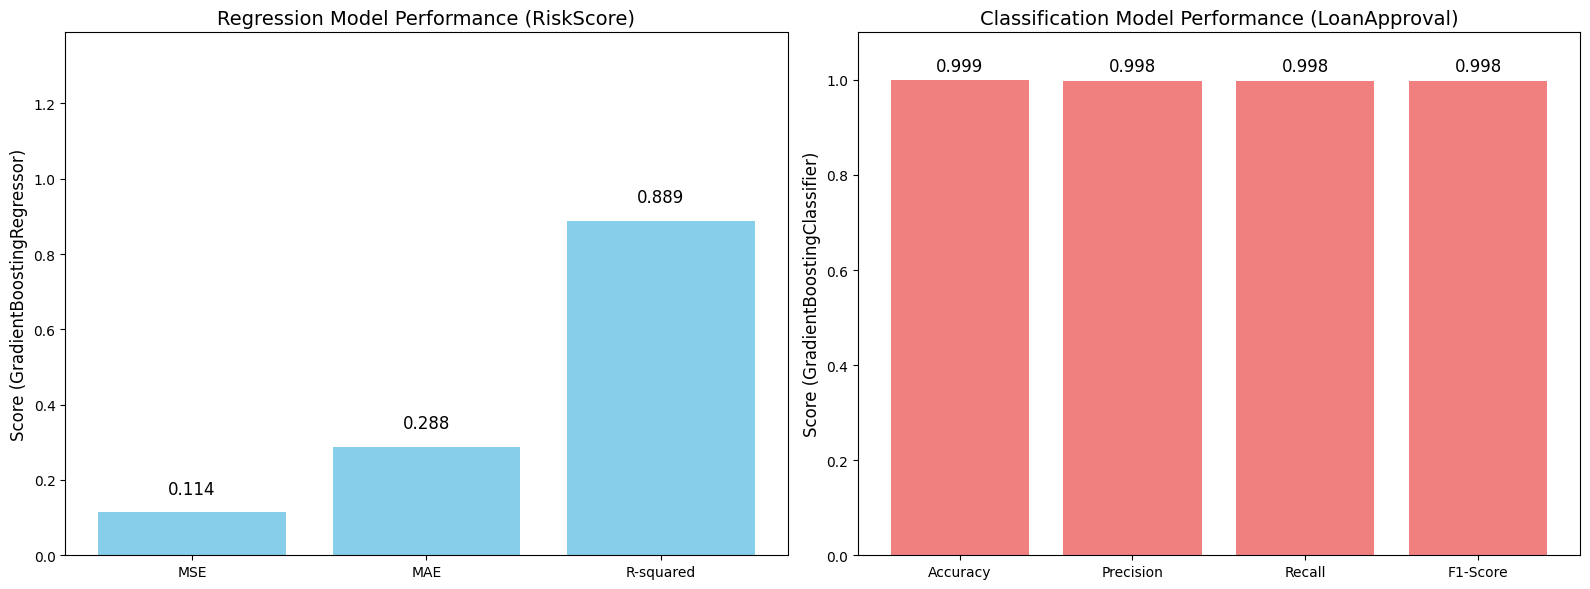

In [ ]:
# Create a figure with 2 subplots: one for regression and one for classification
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --------------- Regression Metrics Bar Chart ----------------- #
# Regression metrics (MSE, MAE, R-squared)
regression_metrics = ['MSE', 'MAE', 'R-squared']
regression_values = [mse1, mae1, r21]

# Bar chart for regression metrics
axs[0].bar(regression_metrics, regression_values, color='skyblue')
axs[0].set_title('Regression Model Performance (RiskScore)', fontsize=14)
axs[0].set_ylabel('Score (GradientBoostingRegressor)', fontsize=12)
axs[0].set_ylim(0, max(regression_values) + 0.5)  # Adjust y-axis for better visibility
for i, v in enumerate(regression_values):
    axs[0].text(i, v + 0.05, f'{v:.3f}', ha='center', fontsize=12)

# --------------- Classification Metrics Bar Chart ----------------- #
# Classification metrics (Accuracy, Precision, Recall, F1-Score)
classification_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
classification_values = [accuracy2, precision2, recall2, f12]

# Bar chart for classification metrics
axs[1].bar(classification_metrics, classification_values, color='lightcoral')
axs[1].set_title('Classification Model Performance (LoanApproval)', fontsize=14)
axs[1].set_ylabel('Score (GradientBoostingClassifier)', fontsize=12)
axs[1].set_ylim(0, 1.1)  # Classification scores are usually between 0 and 1
for i, v in enumerate(classification_values):
    axs[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=12)

# Add some space between subplots for clarity
plt.tight_layout()

# Show the plots
plt.show()

**Final Report**

> Based on the analysis of the loan approval dataset for predicting the `RiskScore`, the `GradientBoostingRegressor` model demonstrated the best performance among the tested models.


> Based on the evaluation of the classification models for predicting `loan approval`, the `GradientBoostingClassifier` with a learning rate of 0.45 and random state set to 0 emerged as the best-performing model. It achieved the highest accuracy and consistently strong results across precision, recall, and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.


